In [2]:
import extract_paths
import matplotlib.pyplot as pyp

paths = extract_paths.load_paths('g21/matches/')

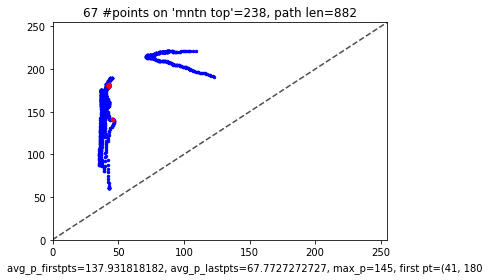

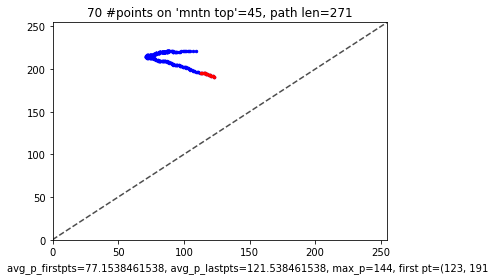

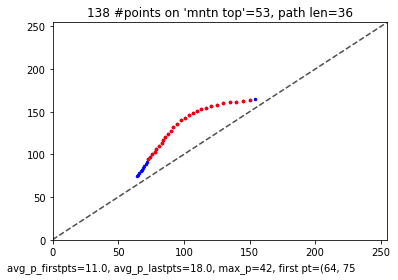

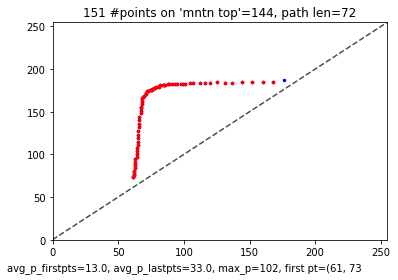

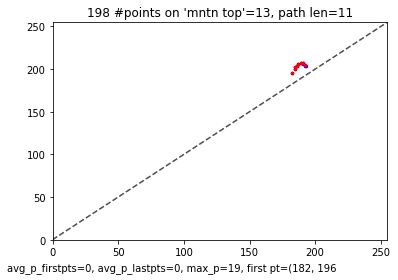

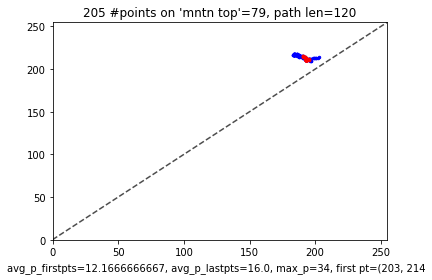

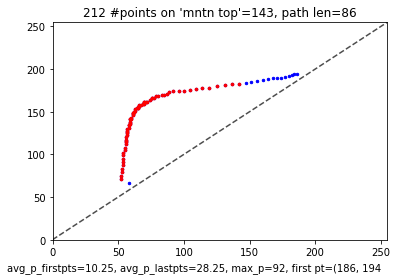

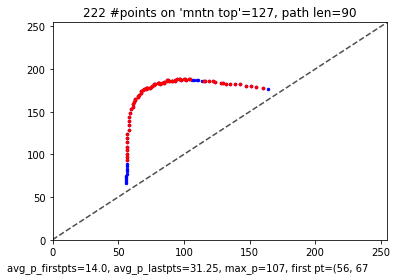

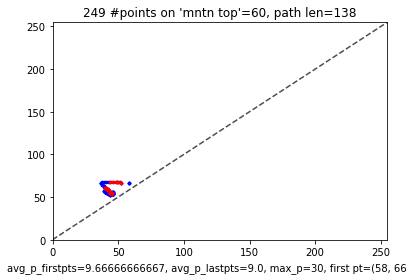

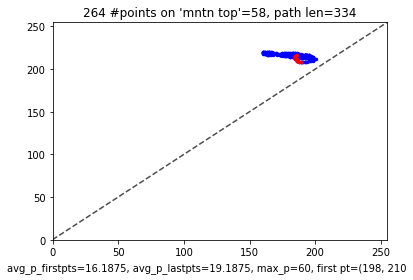

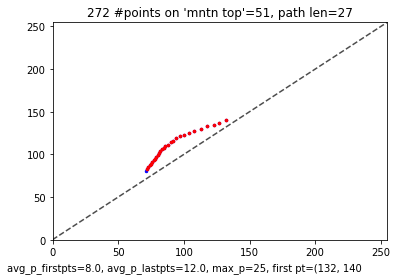

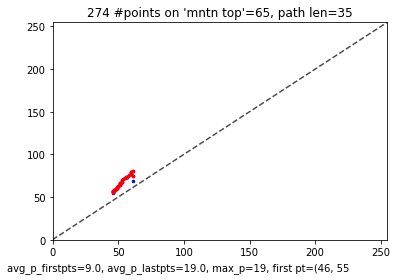

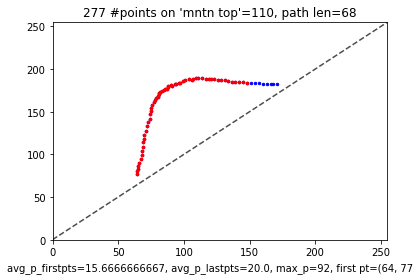

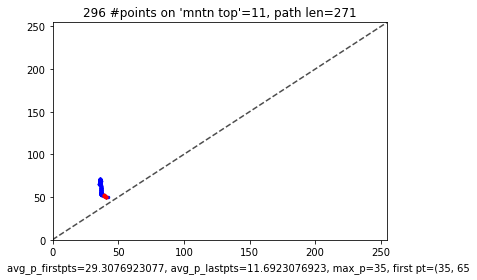

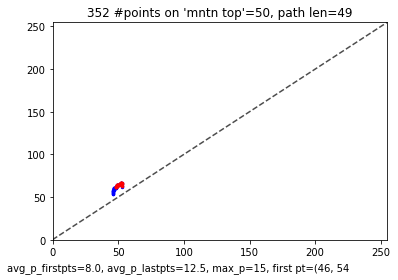

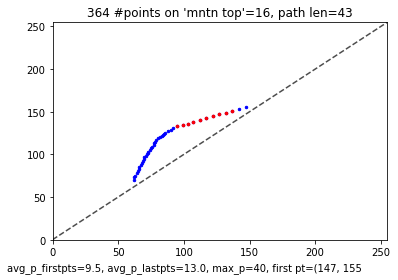

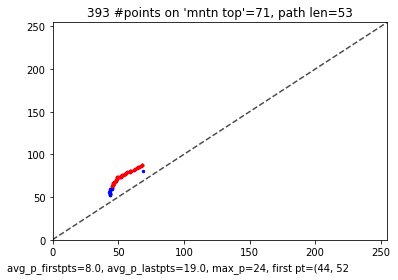

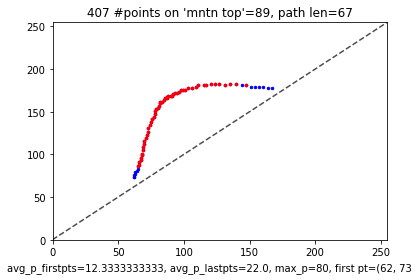

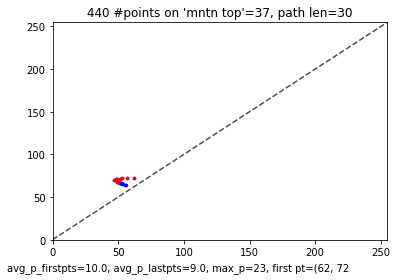

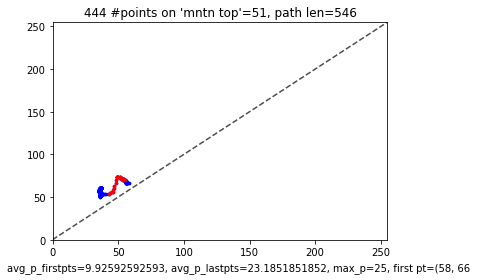

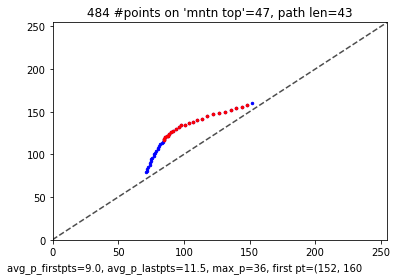

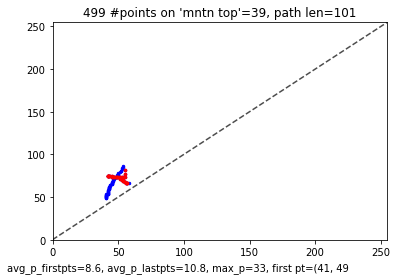

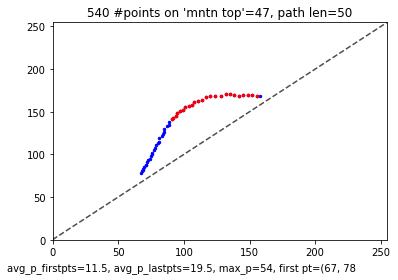

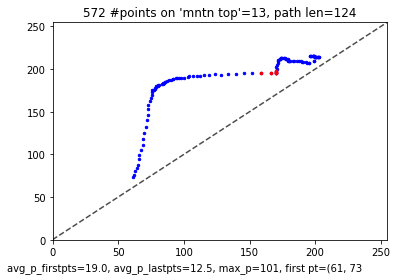

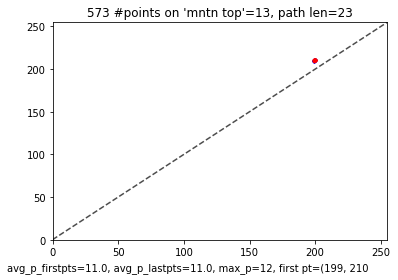

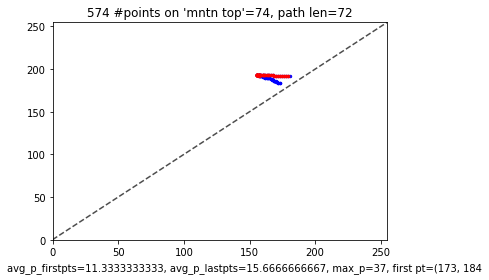

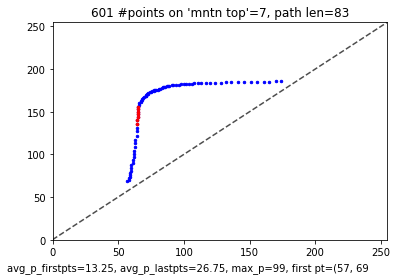

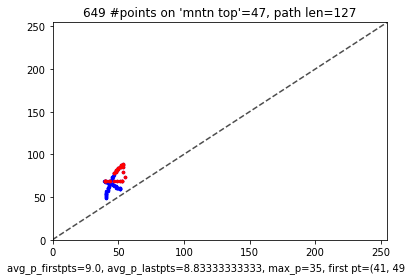

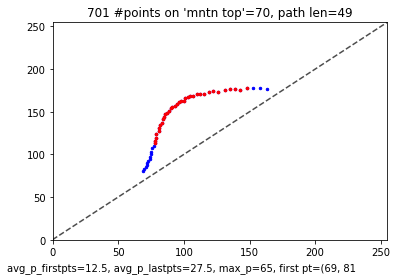

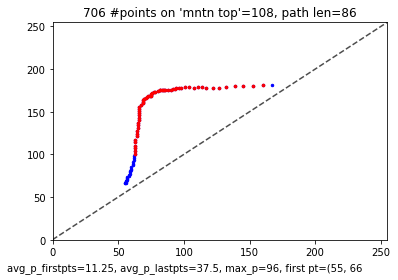

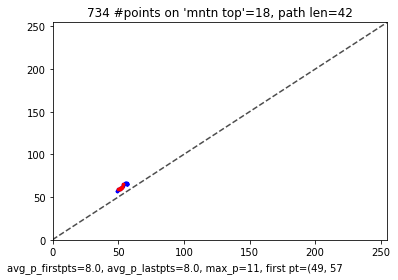

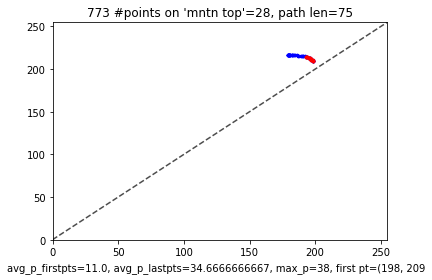

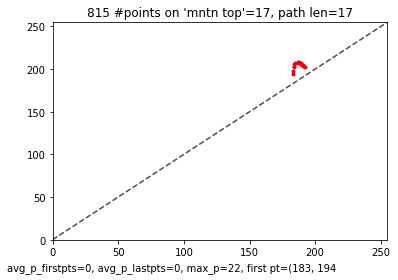

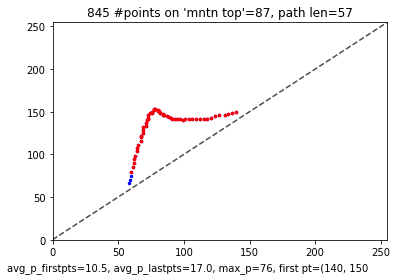

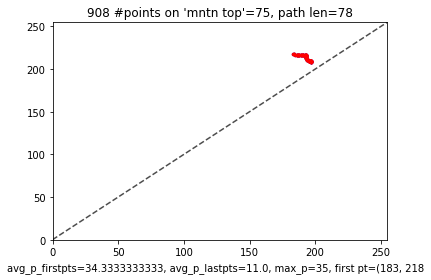

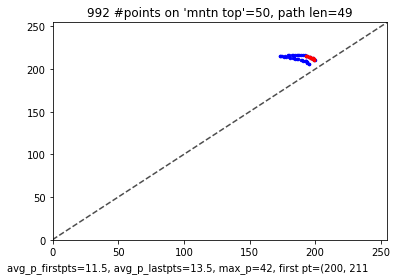

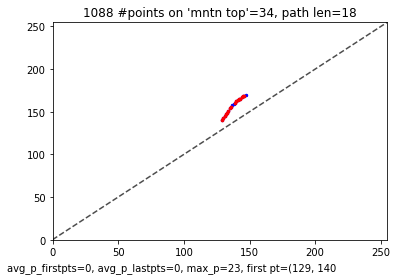

37


In [86]:
from extract_paths import ind
import numpy as np


count_interesting = 0
for i in range(len(paths)):
    
    if( (paths[i][ind('dim')] == 0 and paths[i][ind('high_b_lyap')] > 5) or (paths[i][ind('dim')] == 1 and paths[i][ind('high_d_lyap')] > 5)):       
        count_interesting += 1
        #plots the path which picksup the vector
        pathlen = paths[i][2] - paths[i][1]
        pyp.title( (str)(i) + " #points on 'mntn top'=" + (str)(paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]) + ', path len=' + (str)(pathlen))
        pyp.scatter(paths[i][ind('birth')], paths[i][ind('death')], c= 'blue', s=6)
        if(paths[i][ind('dim')] == 0):  
            pyp.scatter(np.array(paths[i][ind('birth')][:pathlen])[np.equal(paths[i][ind('b_lyap')], np.zeros(pathlen))], np.array(paths[i][ind('death')][:pathlen])[np.equal(paths[i][ind('b_lyap')], np.zeros(pathlen))], c= 'red', s=7)
        if(paths[i][ind('dim')] == 1):
            pyp.scatter(np.array(paths[i][ind('birth')][:pathlen])[np.equal(paths[i][ind('d_lyap')], np.zeros(pathlen))], np.array(paths[i][ind('death')][:pathlen])[np.equal(paths[i][ind('d_lyap')], np.zeros(pathlen))], c= 'red', s=7)
        pyp.figtext(.02, .02, "avg_p_firstpts=" + (str)(paths[i][ind('avg_p_firstpts')]) + ", avg_p_lastpts=" + (str)(paths[i][ind('avg_p_lastpts')]) + ", max_p=" + (str)(paths[i][ind('max_p')]) + ', first pt=(' + (str)(paths[i][ind('birth')][0]) + ', ' + (str)(paths[i][ind('death')][0]) )
        ax = pyp.gca()        
        ax.set_ylim([0,255])
        ax.set_xlim([0,255])
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        pyp.show()

print(count_interesting)

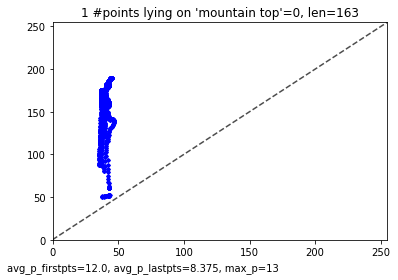

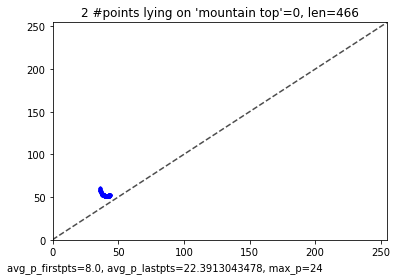

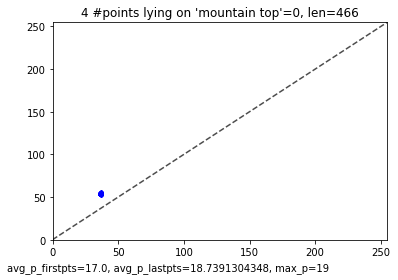

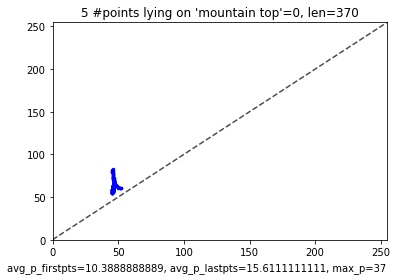

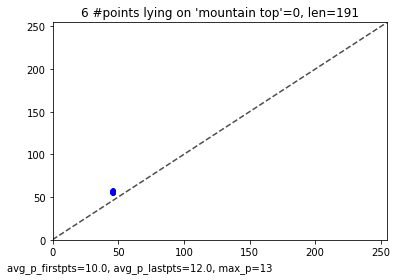

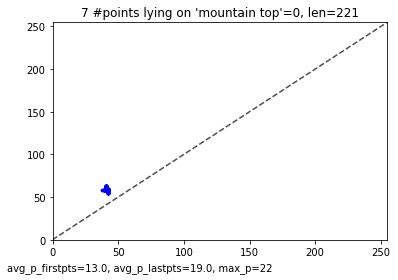

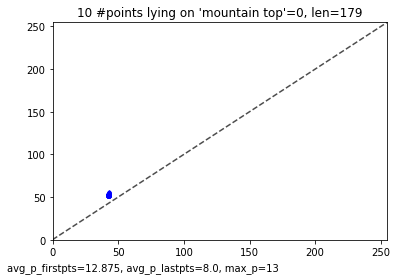

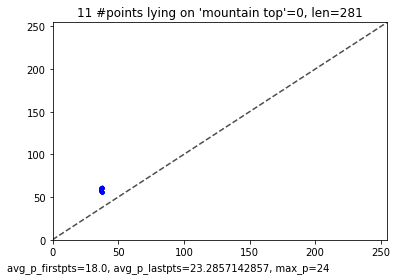

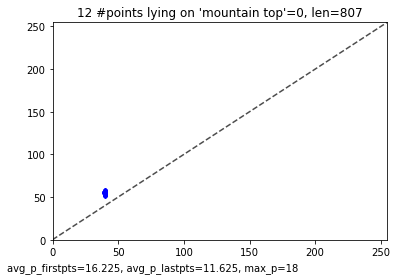

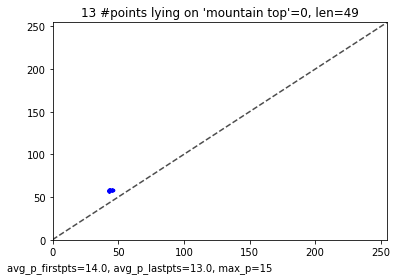

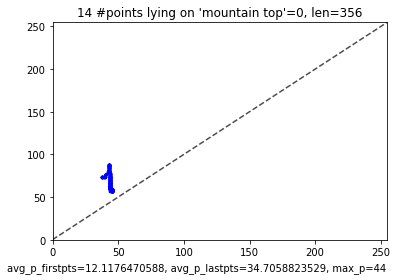

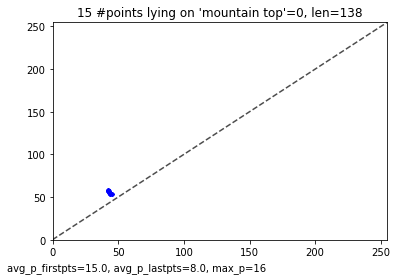

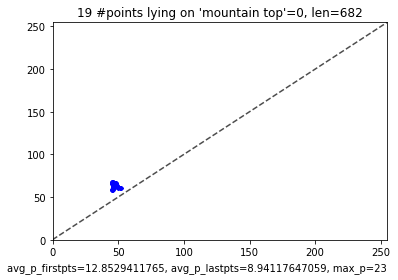

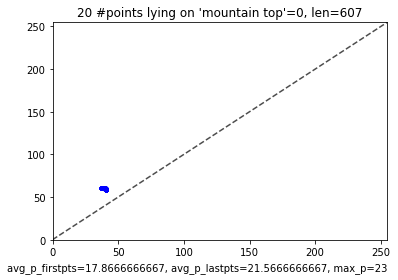

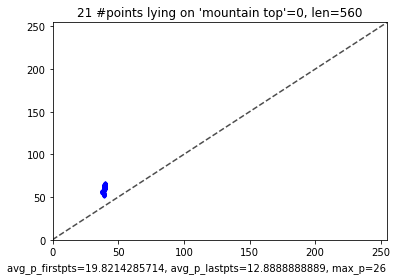

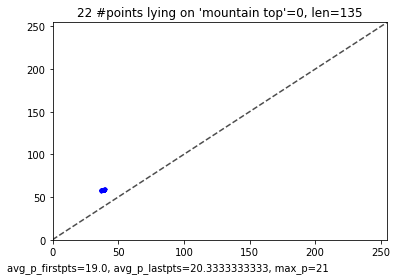

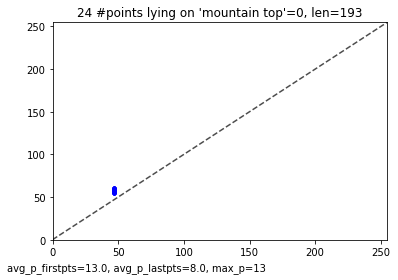

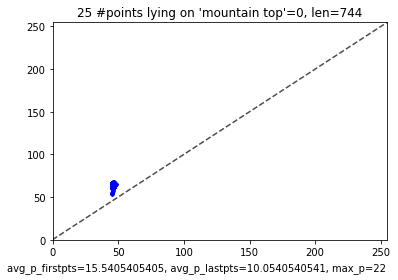

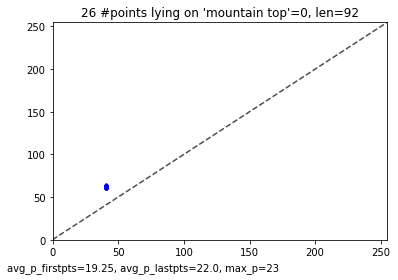

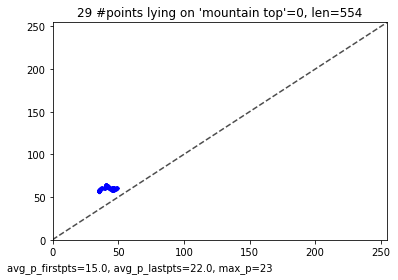

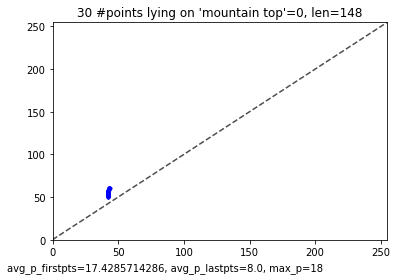

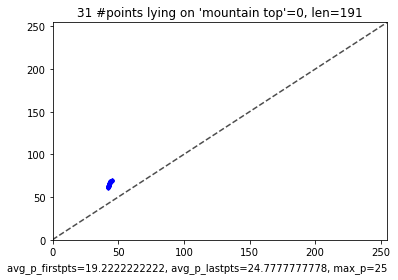

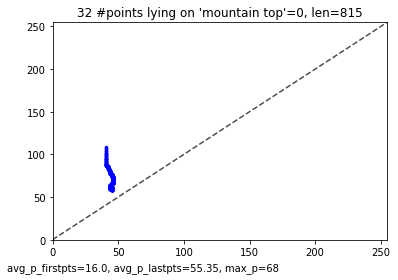

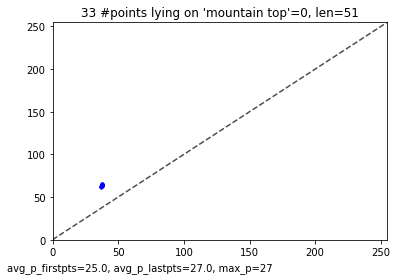

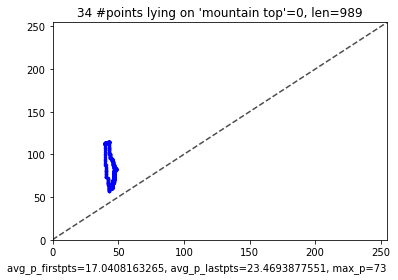

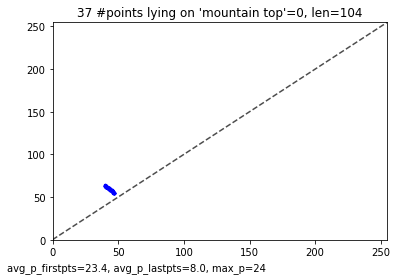

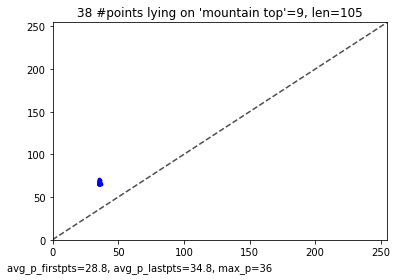

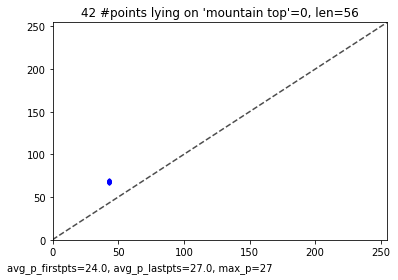

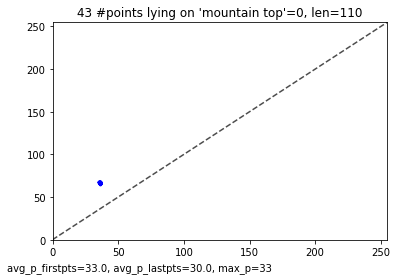

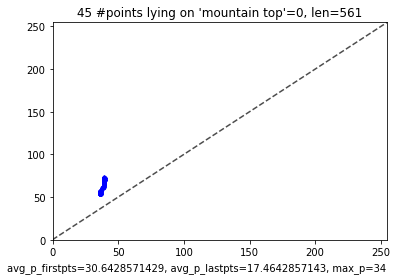

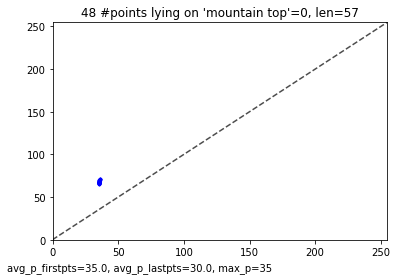

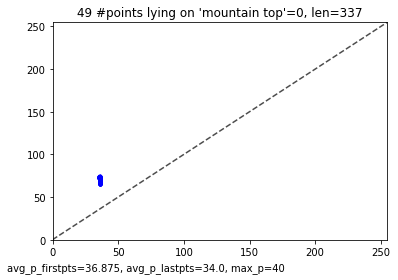

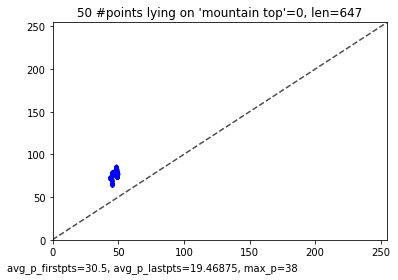

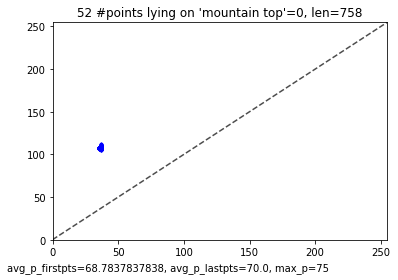

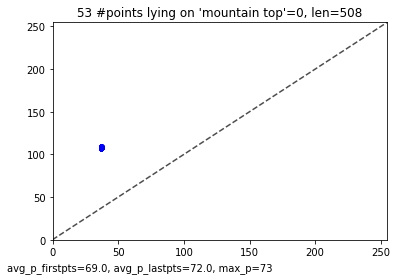

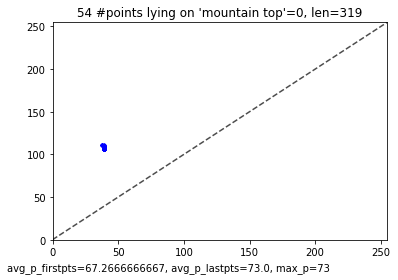

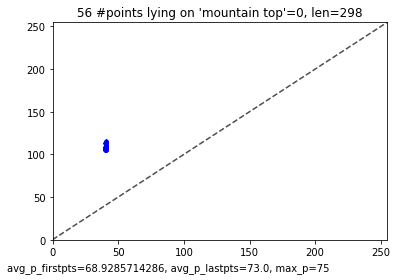

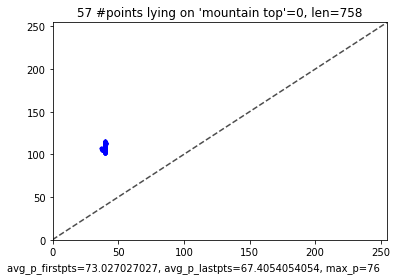

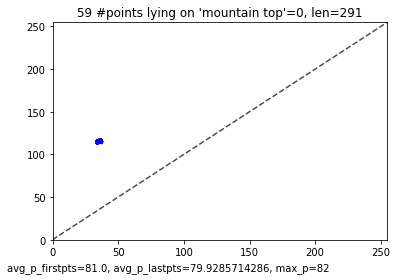

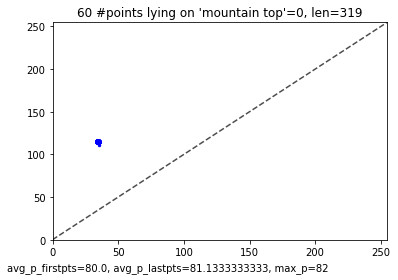

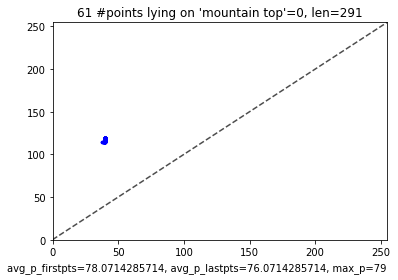

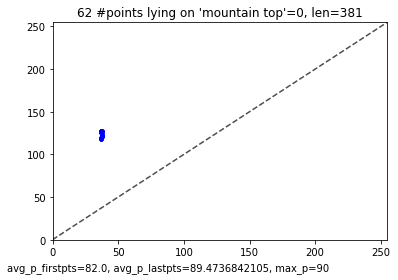

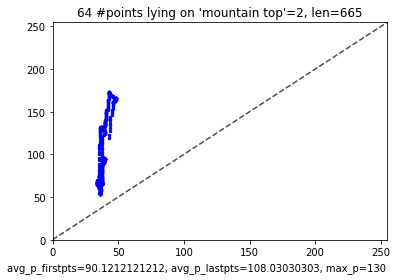

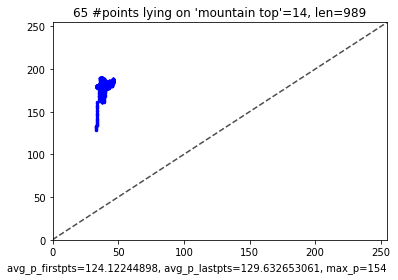

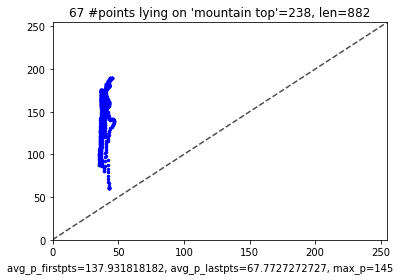

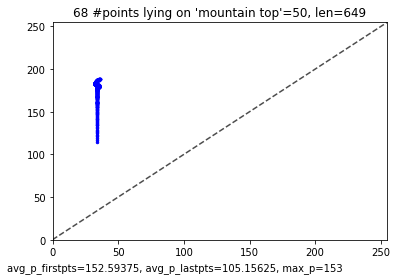

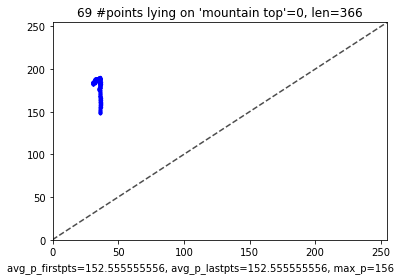

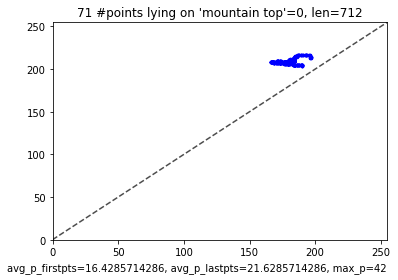

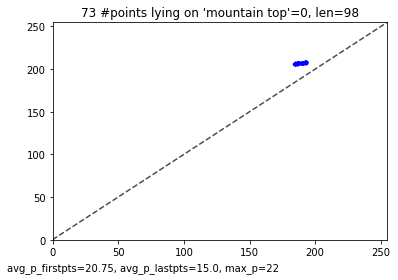

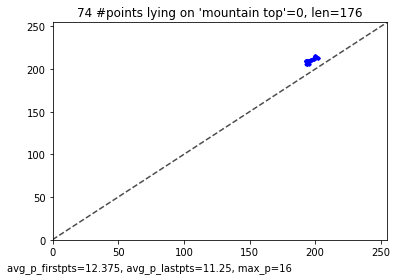

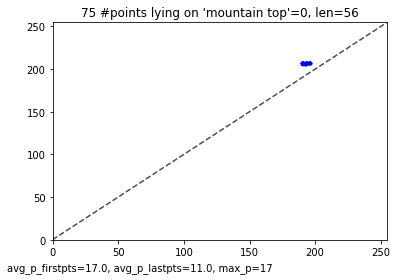

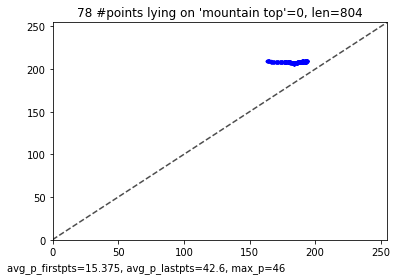

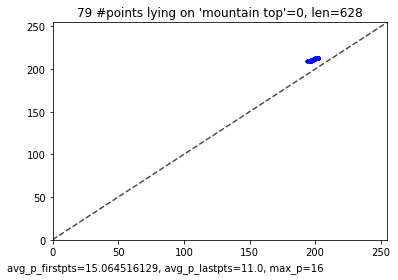

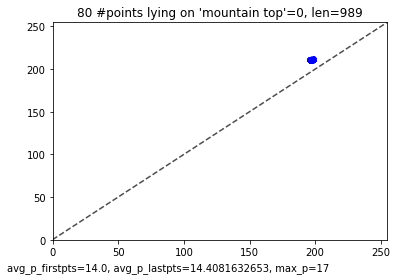

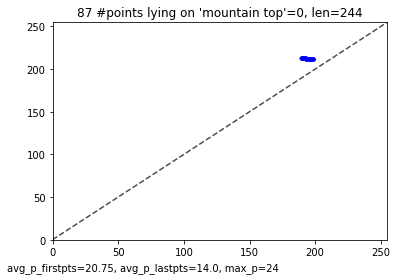

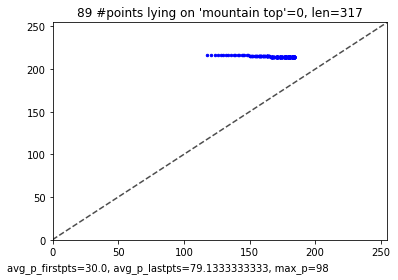

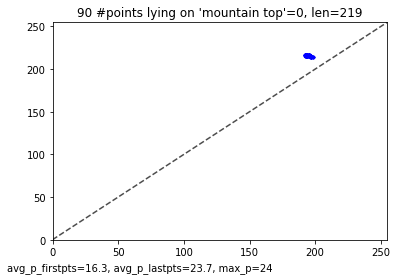

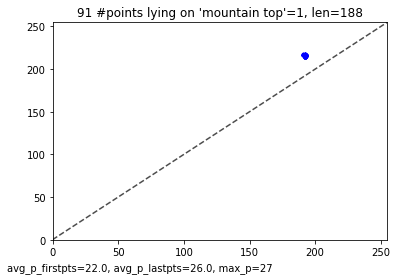

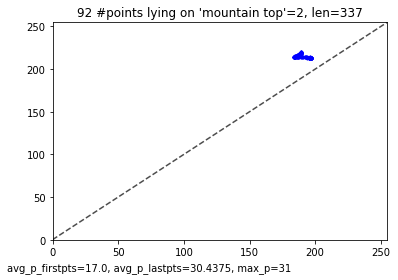

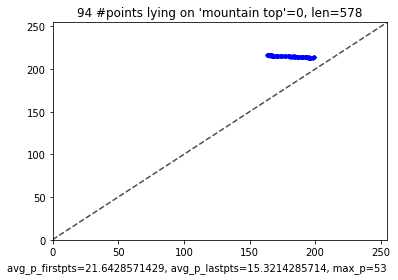

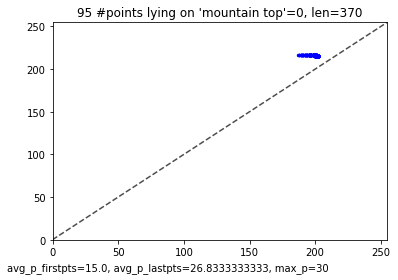

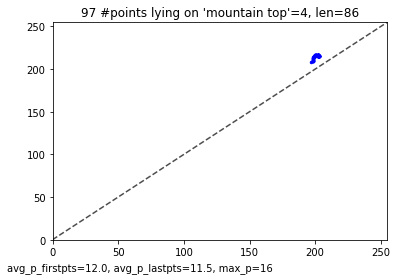

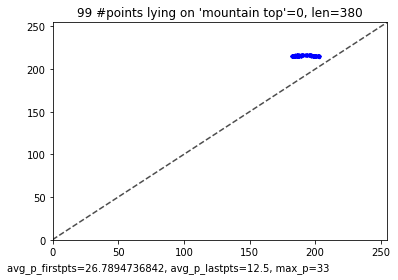

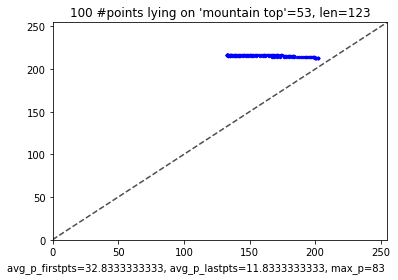

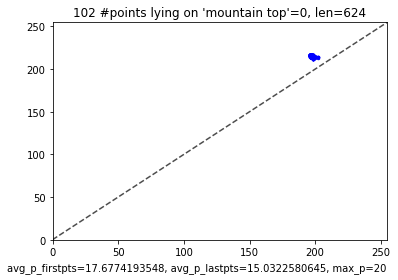

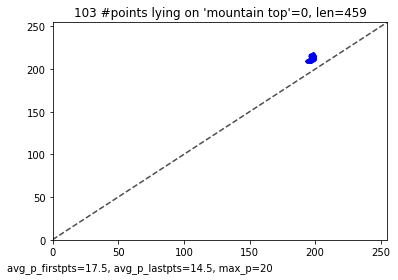

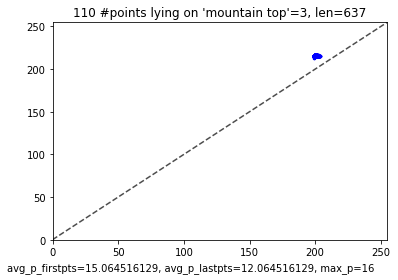

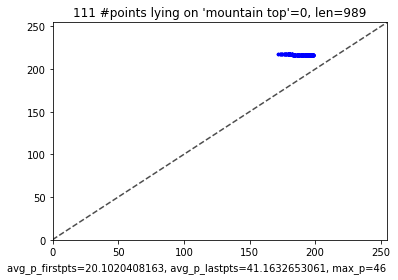

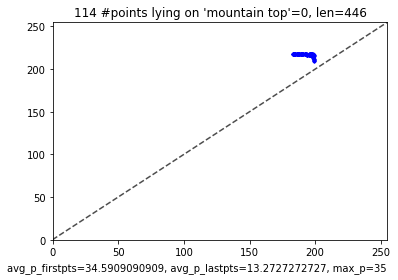

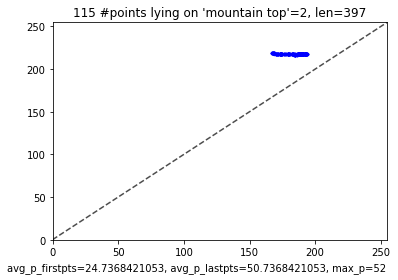

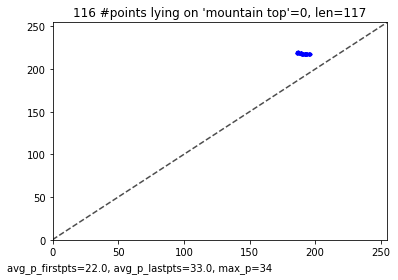

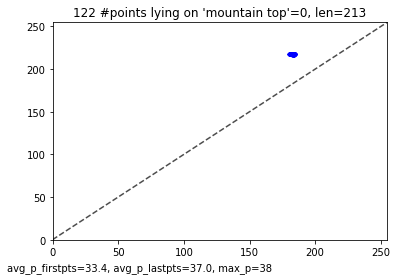

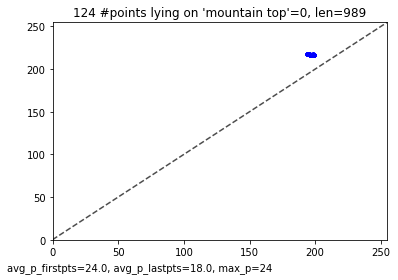

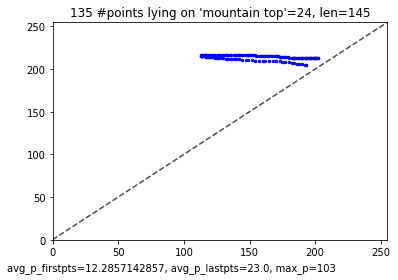

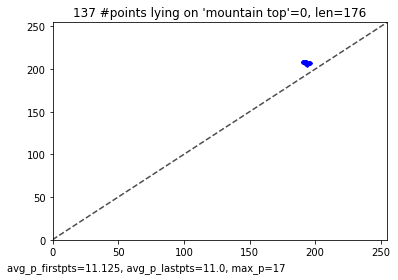

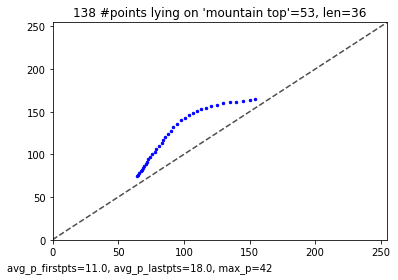

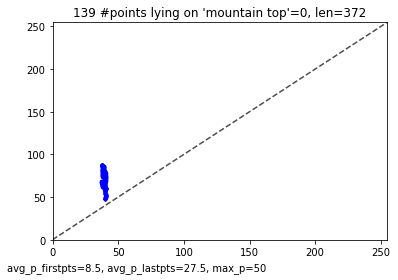

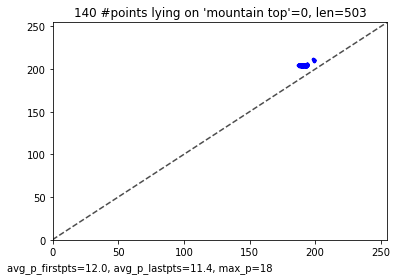

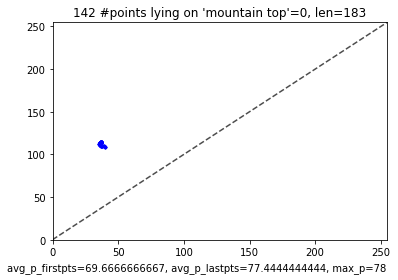

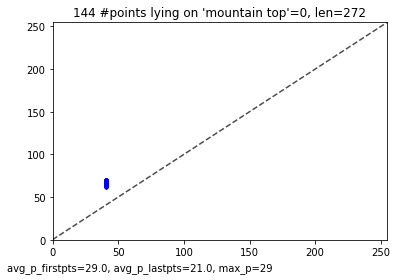

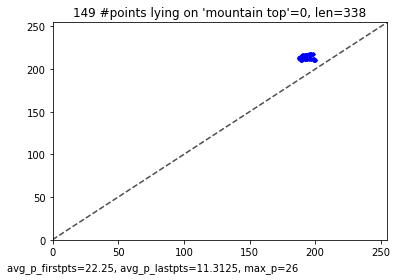

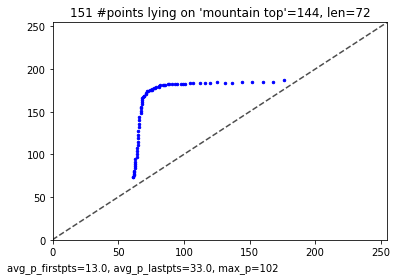

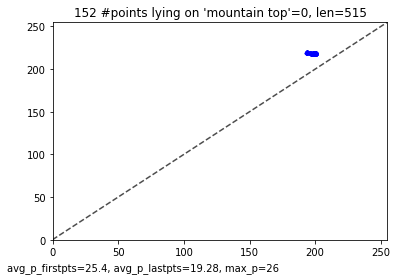

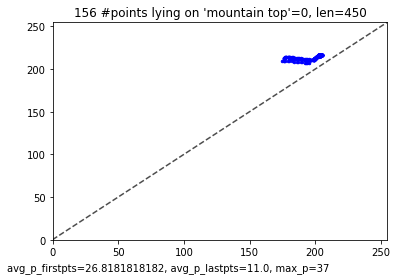

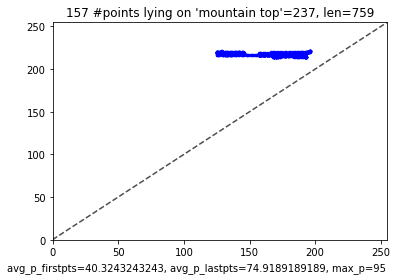

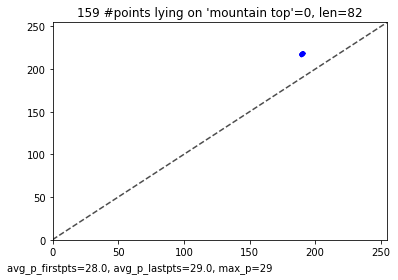

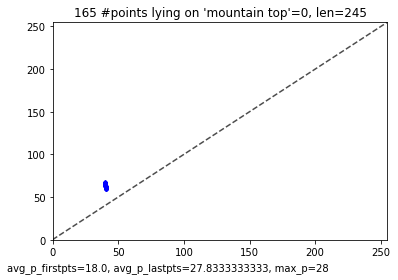

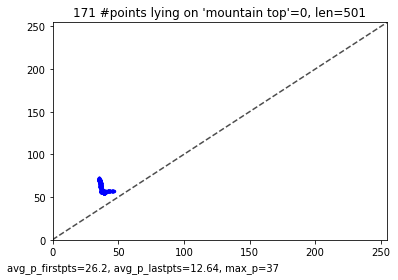

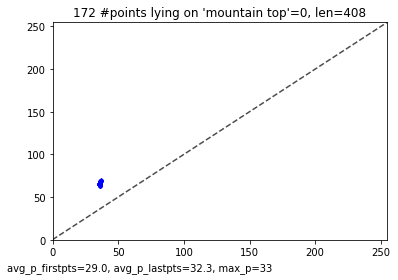

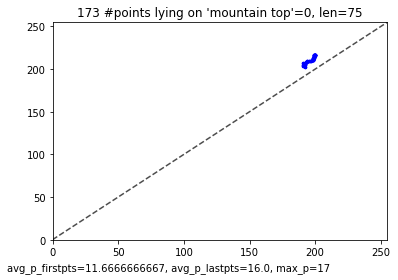

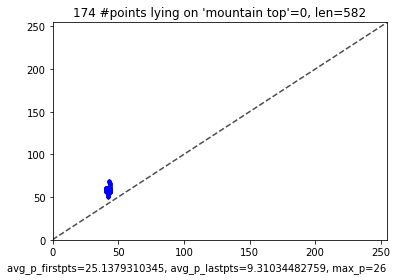

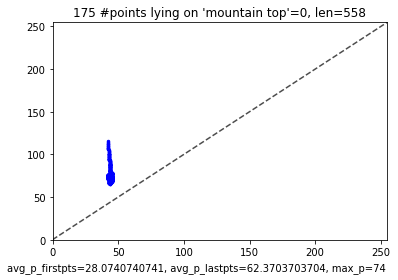

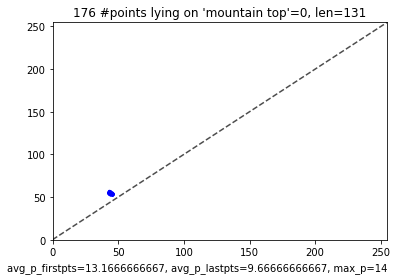

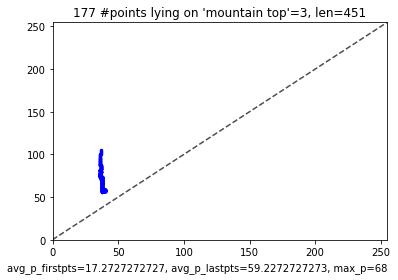

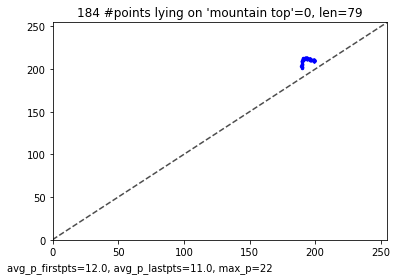

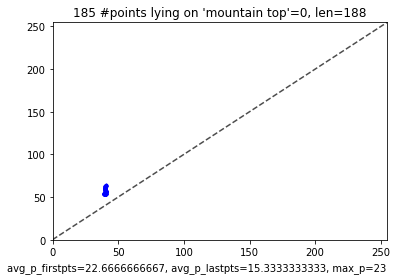

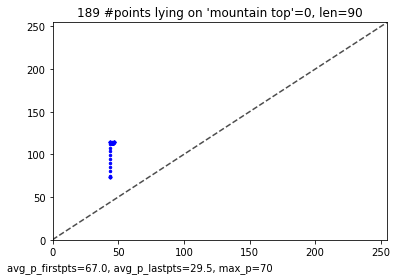

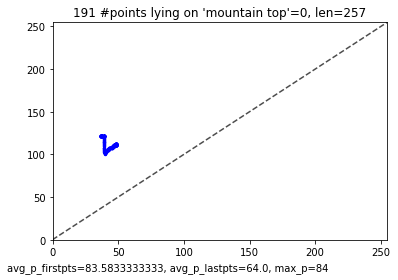

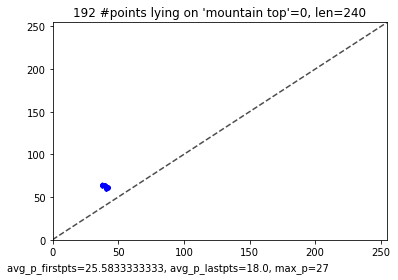

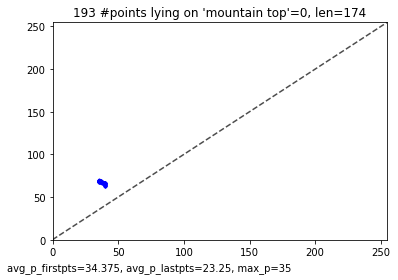

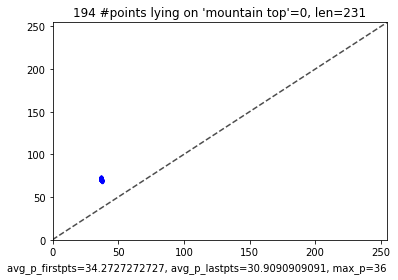

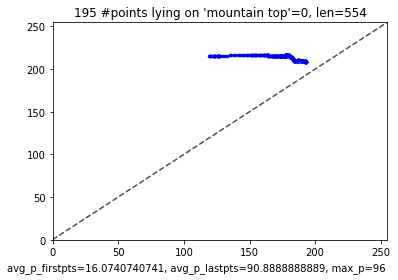

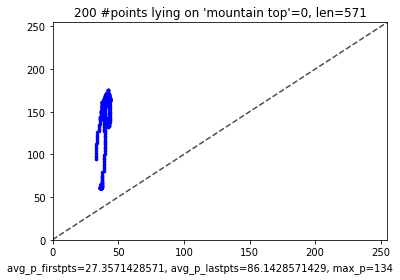

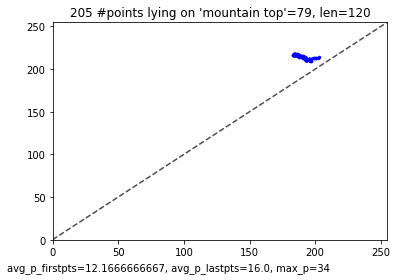

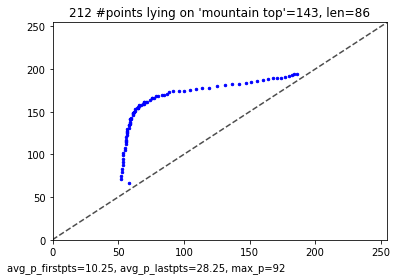

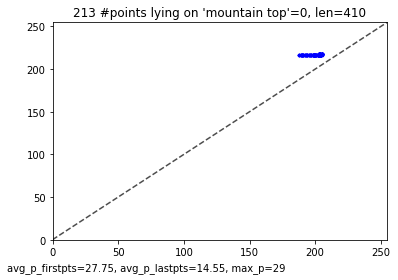

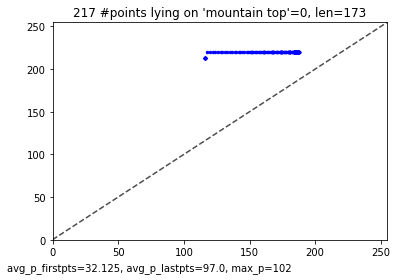

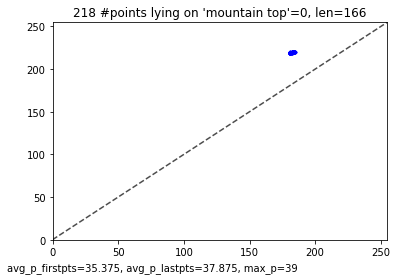

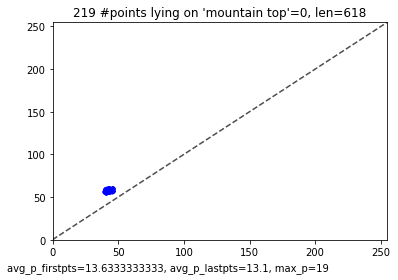

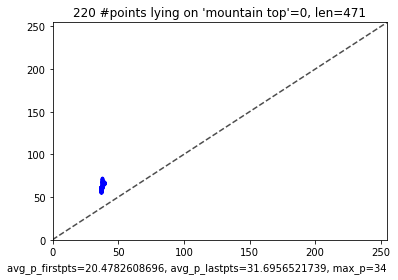

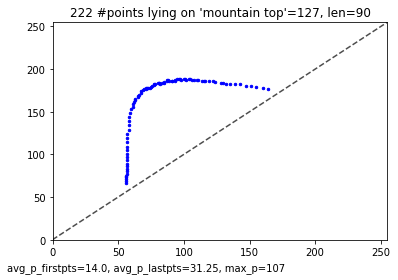

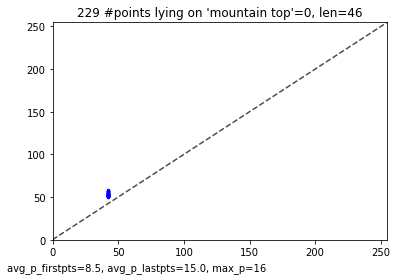

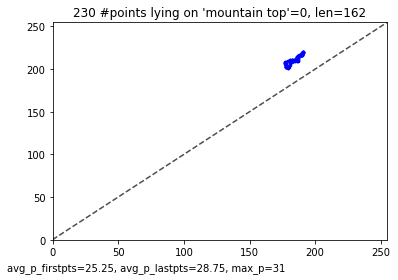

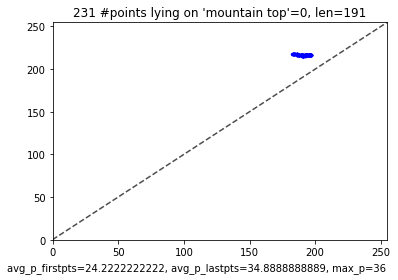

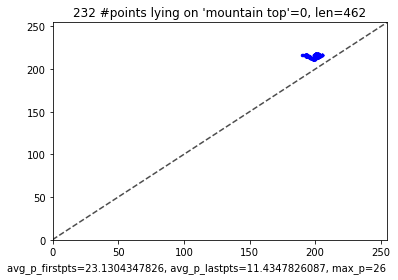

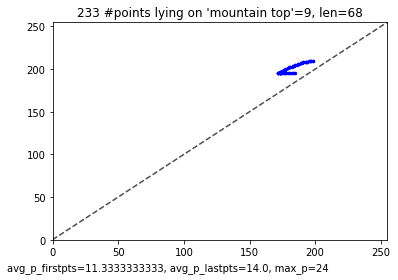

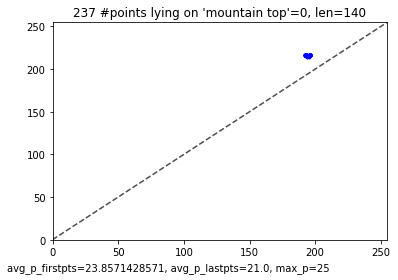

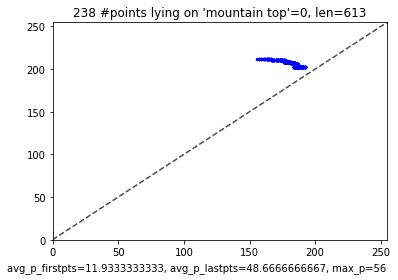

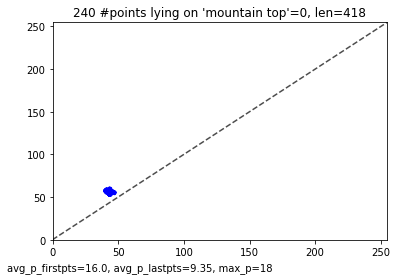

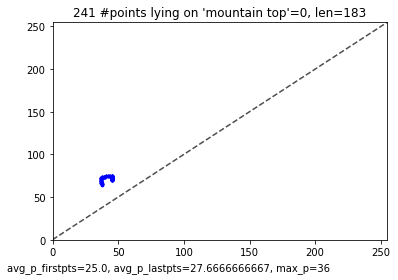

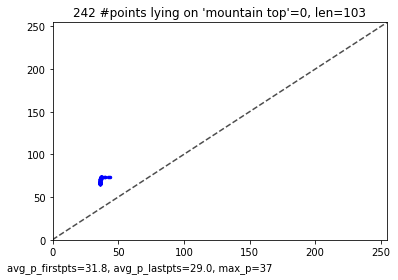

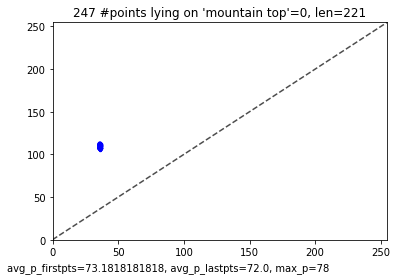

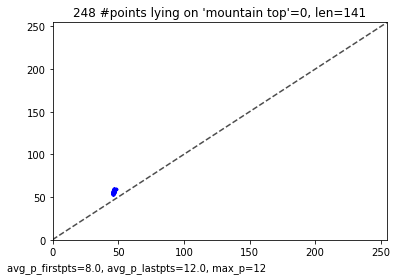

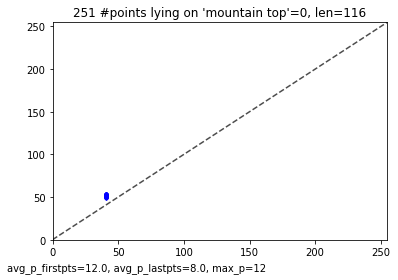

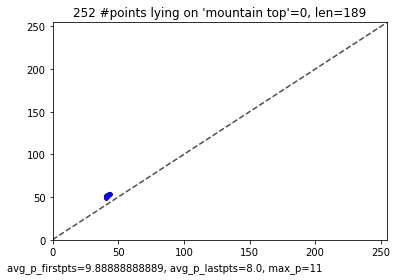

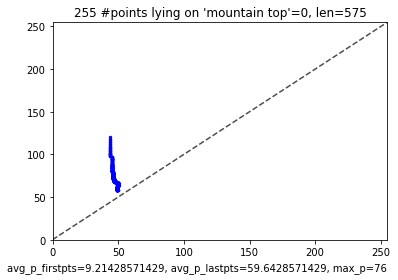

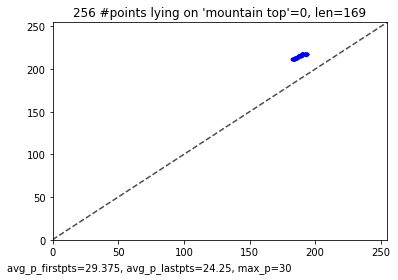

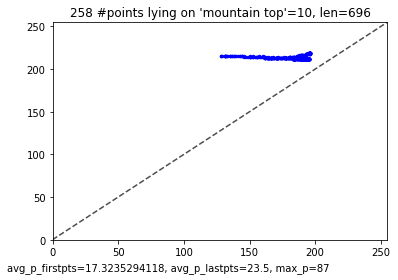

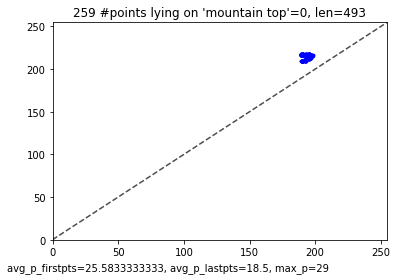

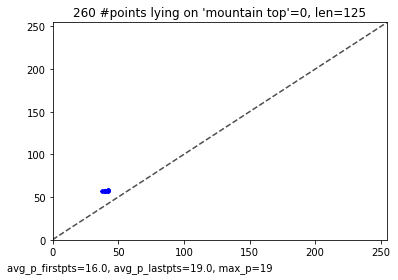

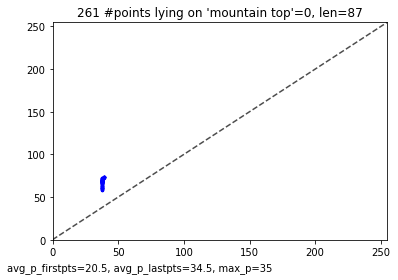

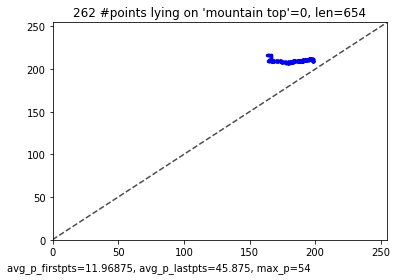

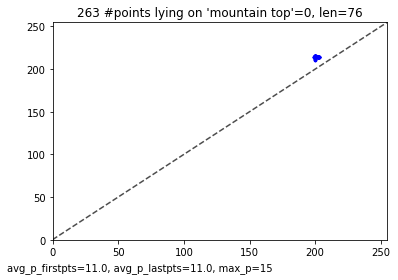

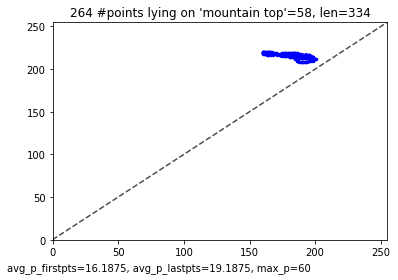

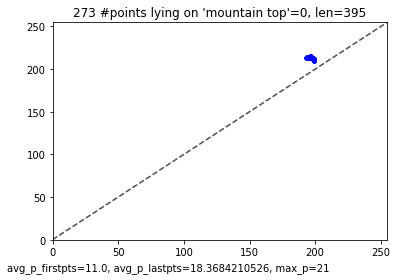

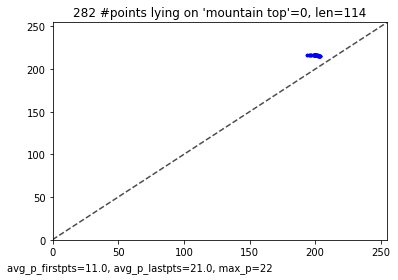

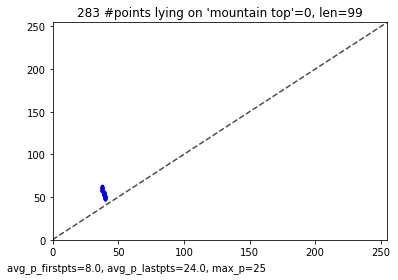

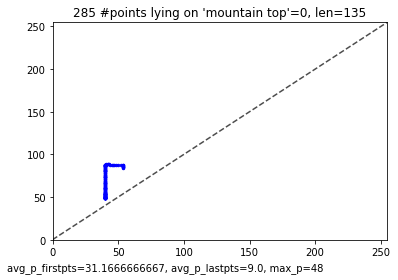

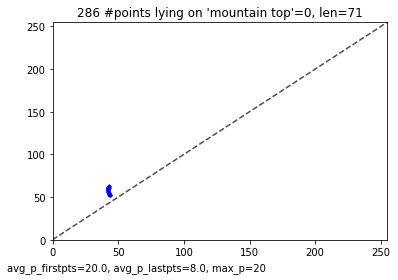

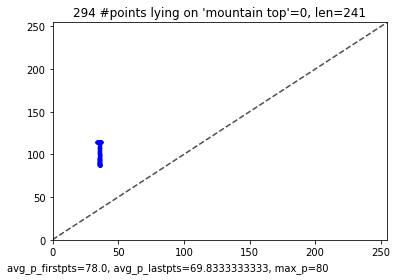

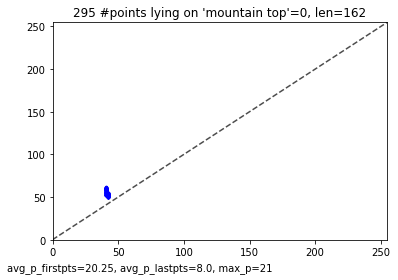

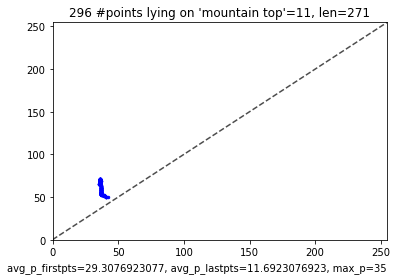

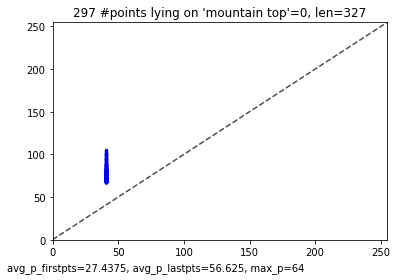

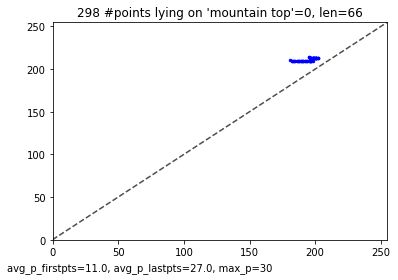

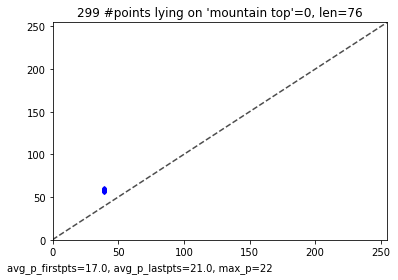

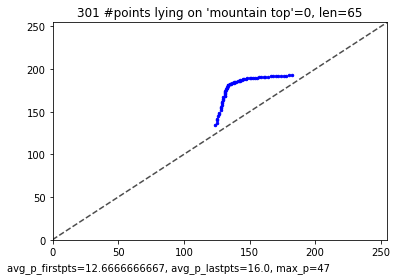

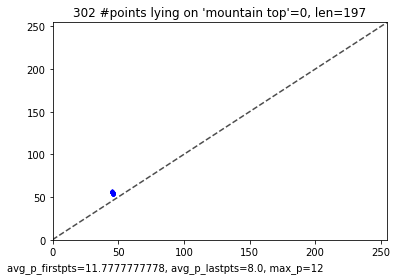

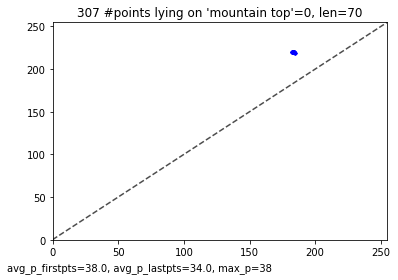

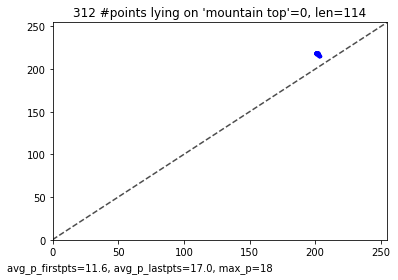

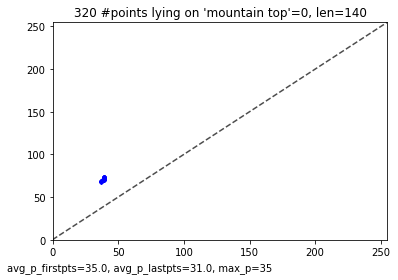

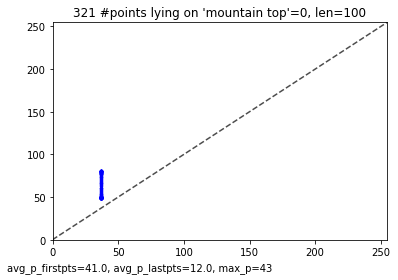

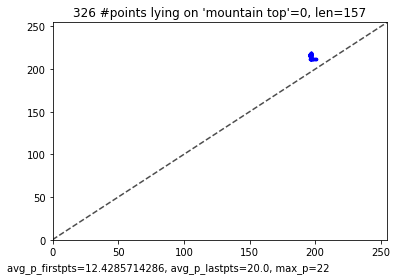

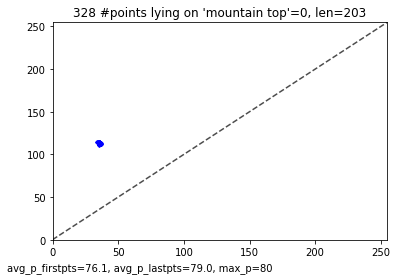

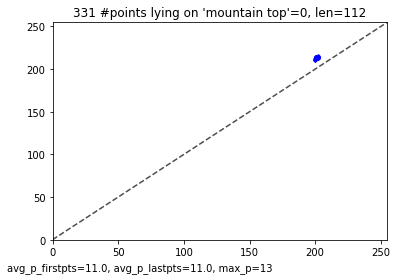

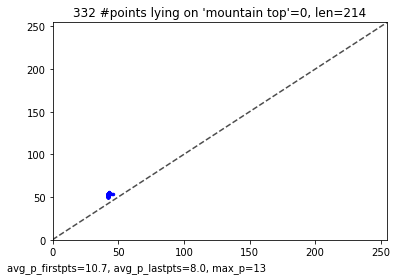

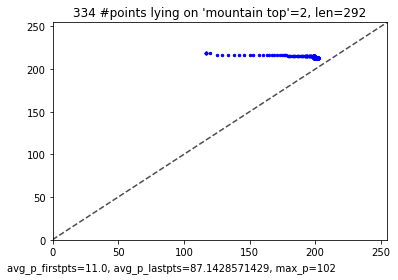

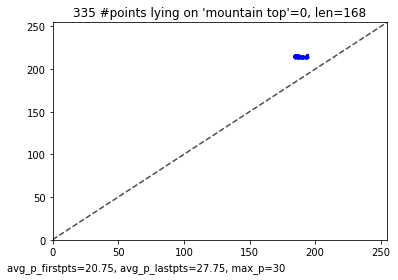

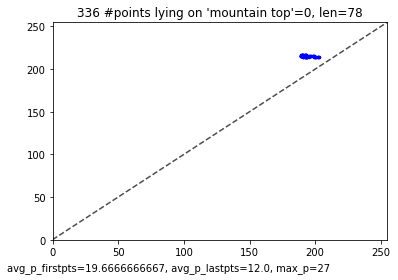

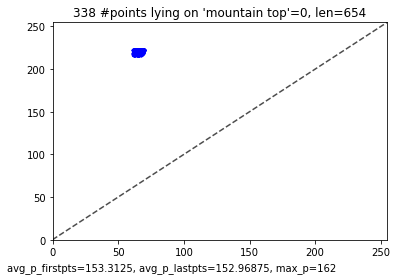

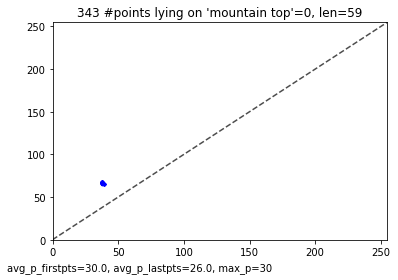

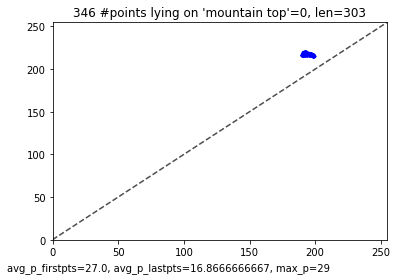

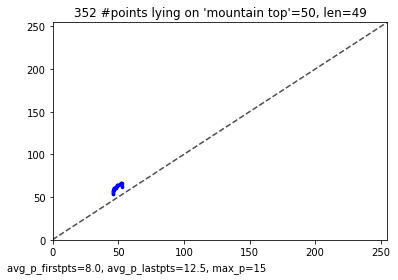

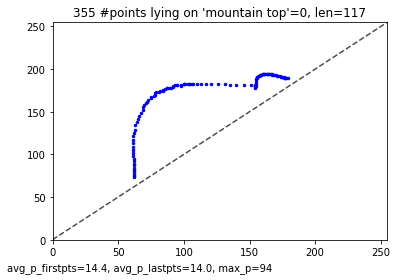

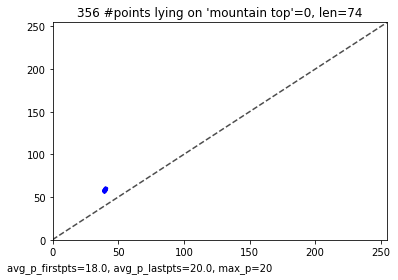

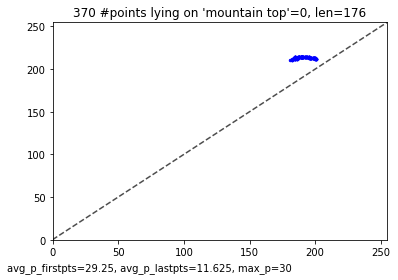

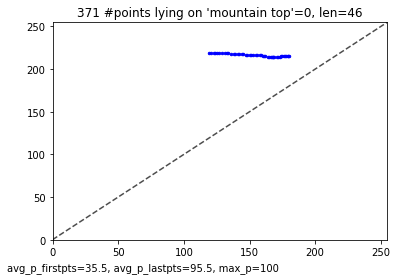

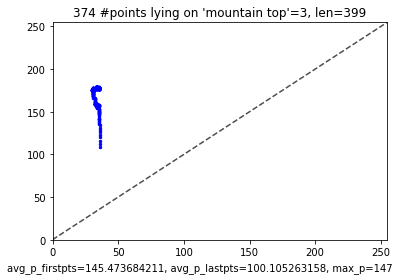

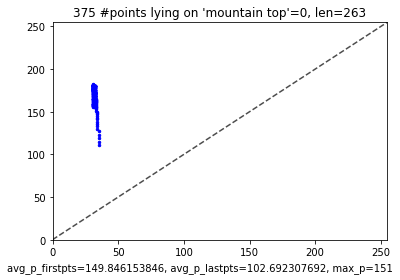

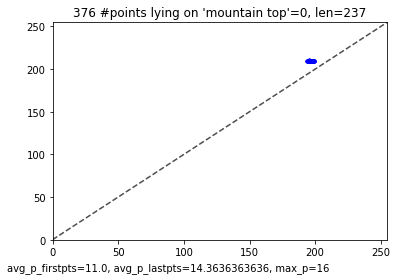

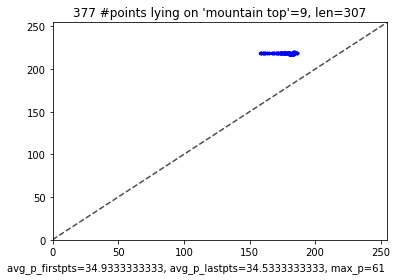

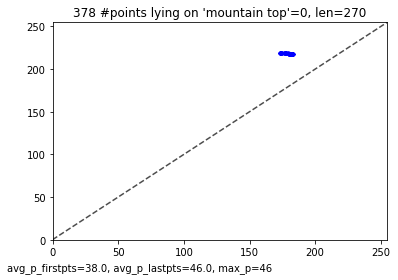

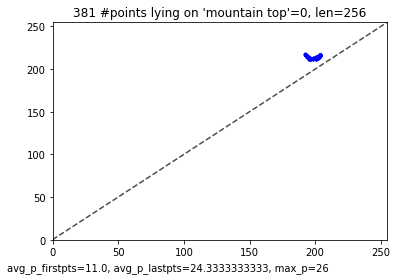

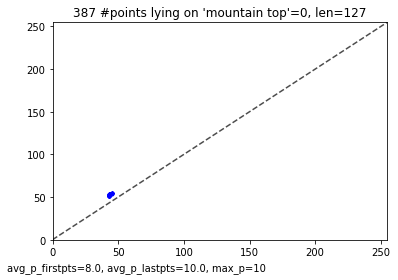

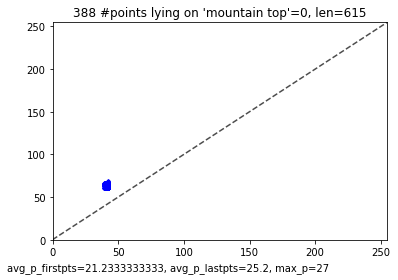

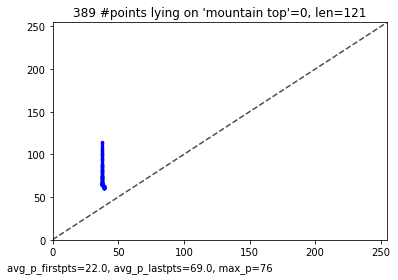

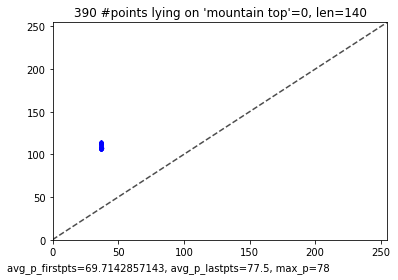

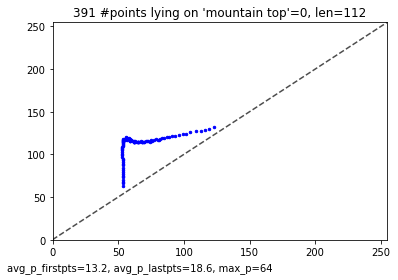

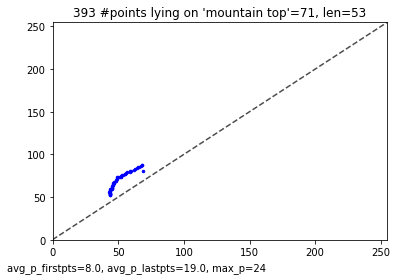

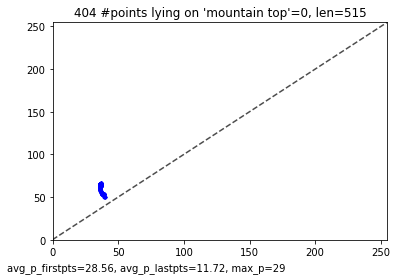

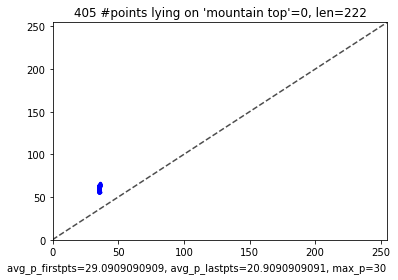

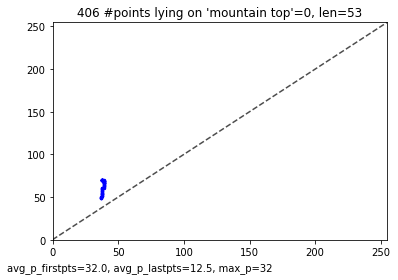

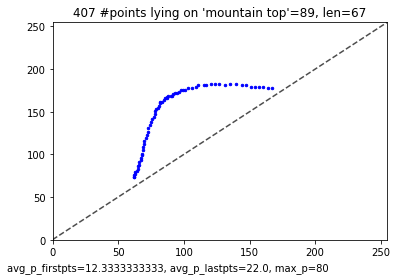

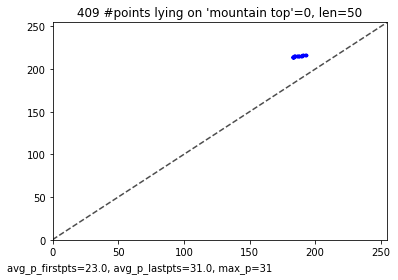

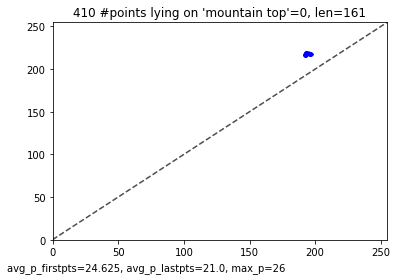

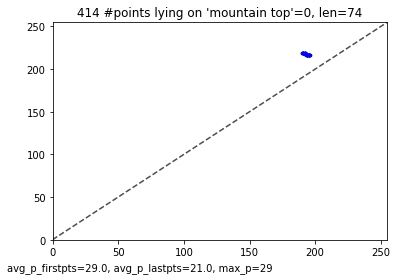

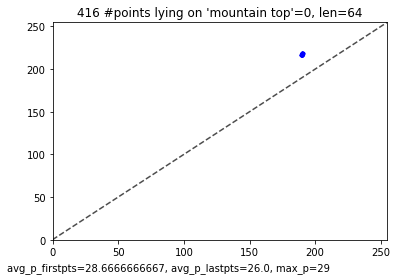

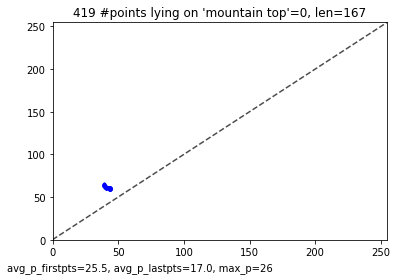

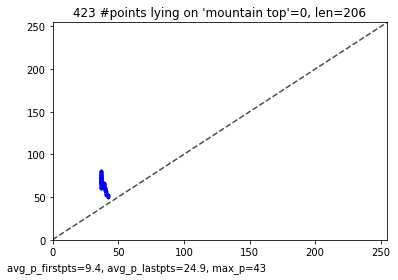

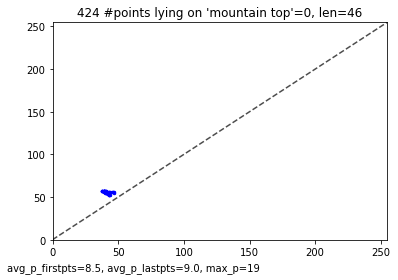

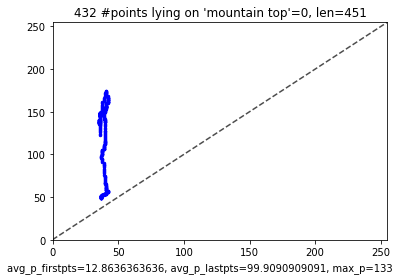

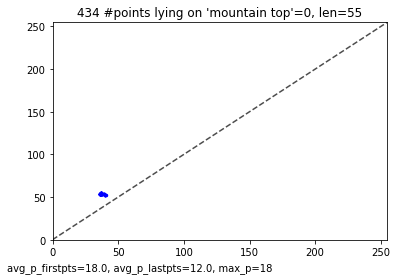

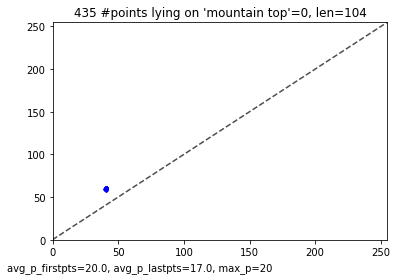

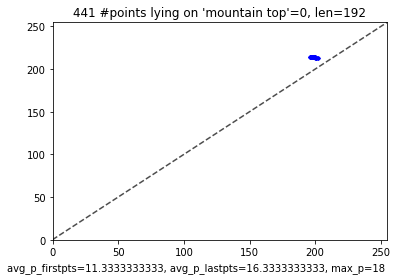

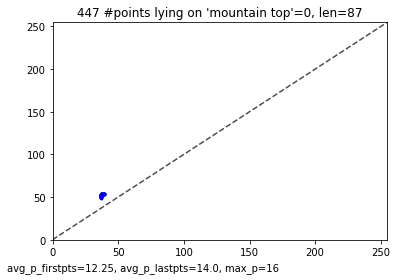

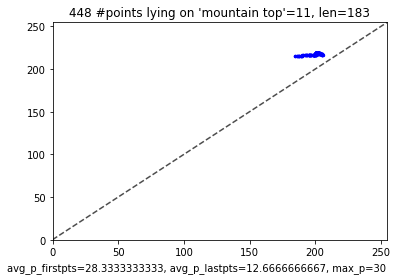

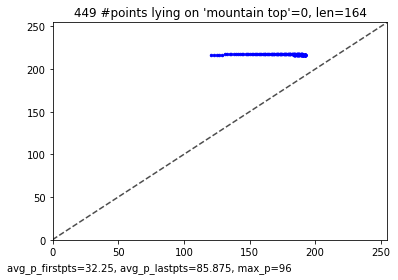

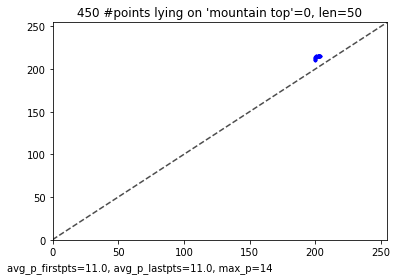

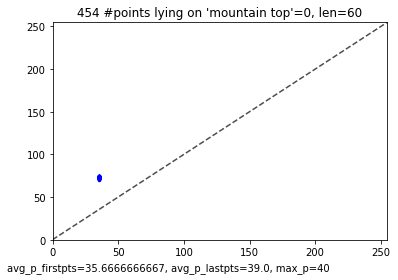

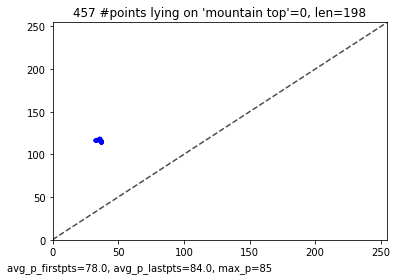

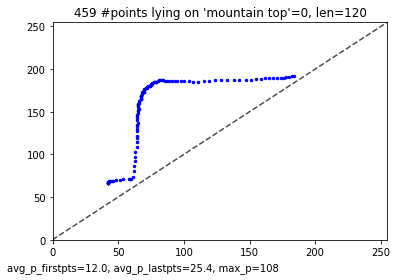

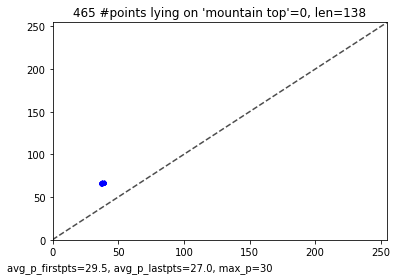

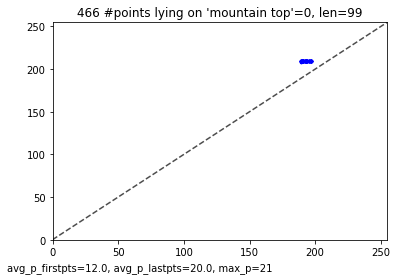

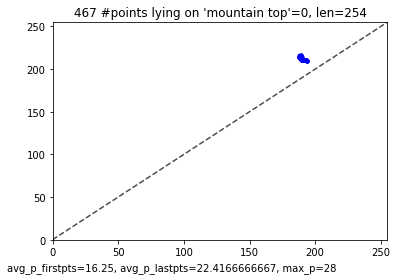

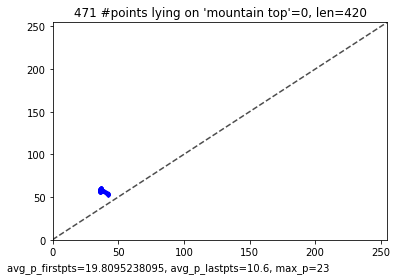

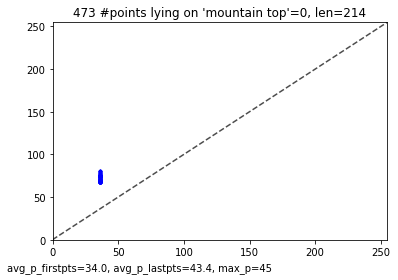

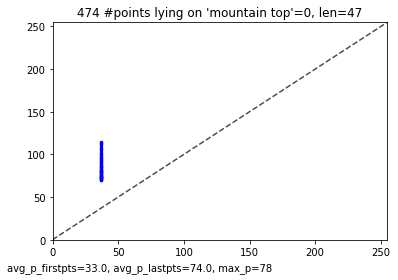

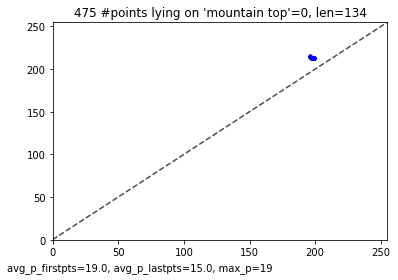

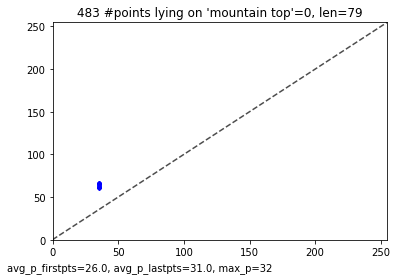

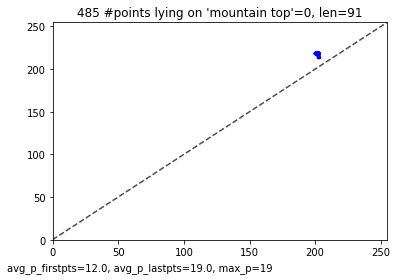

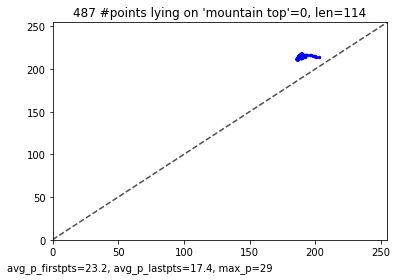

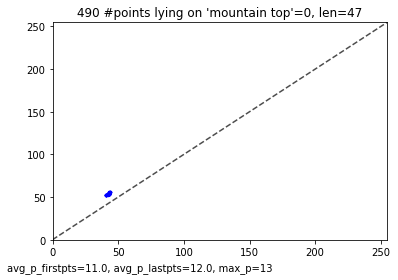

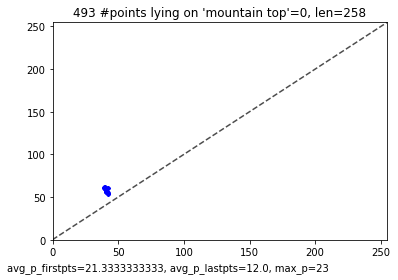

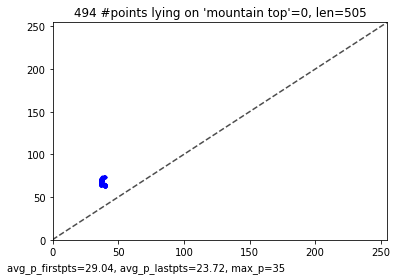

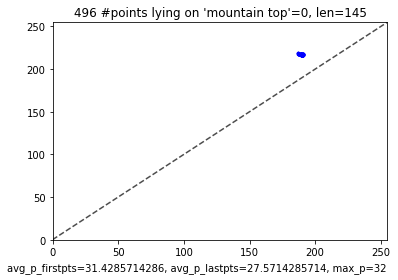

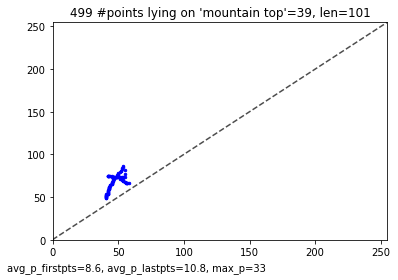

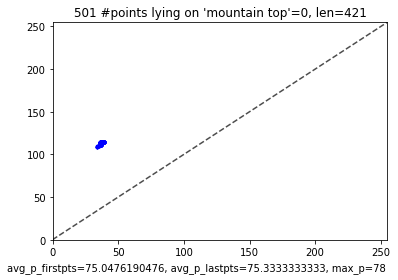

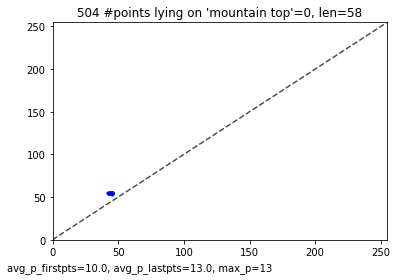

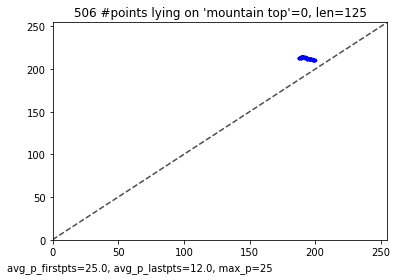

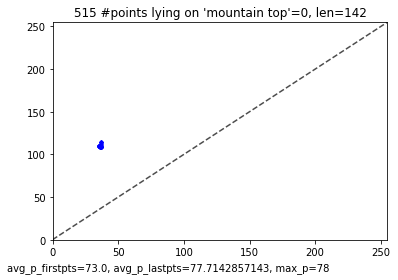

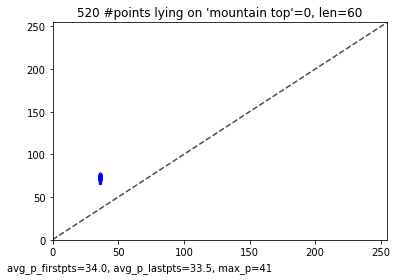

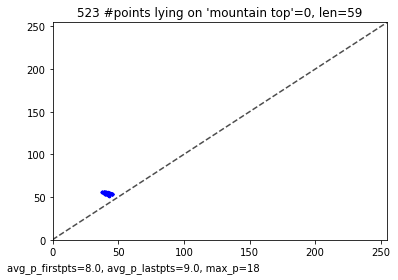

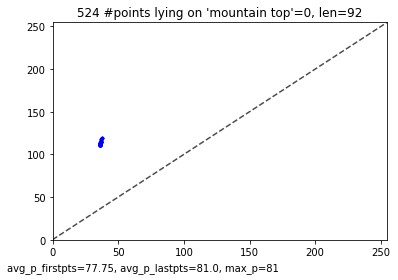

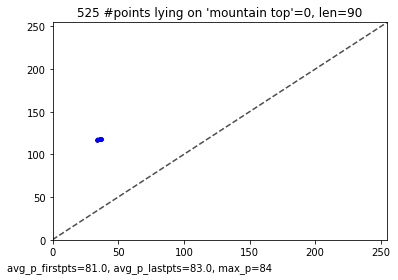

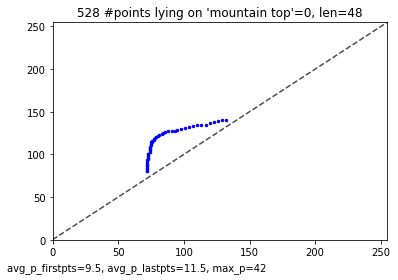

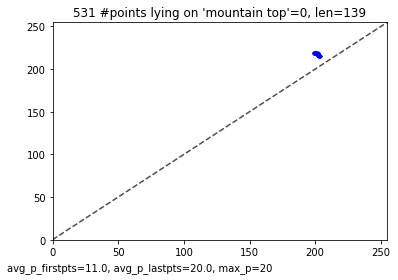

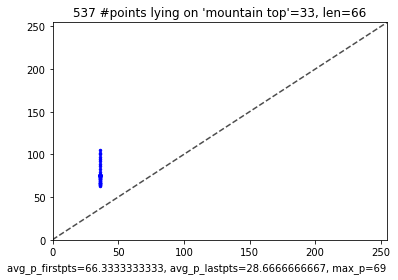

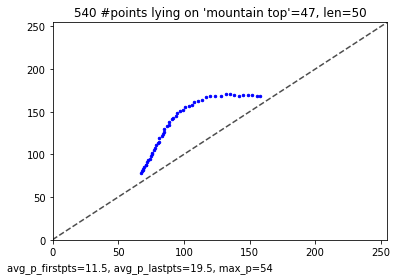

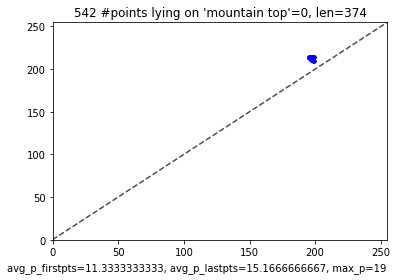

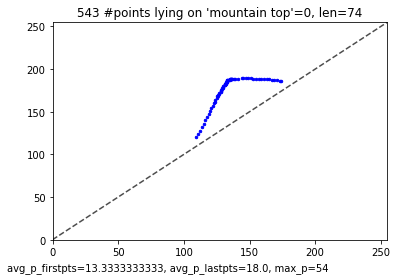

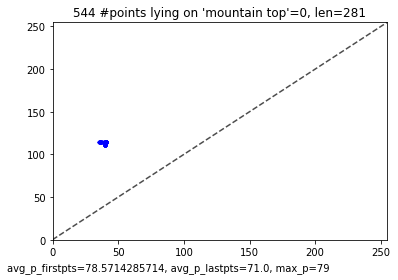

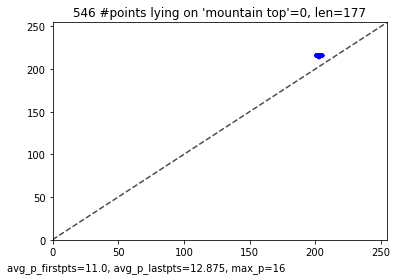

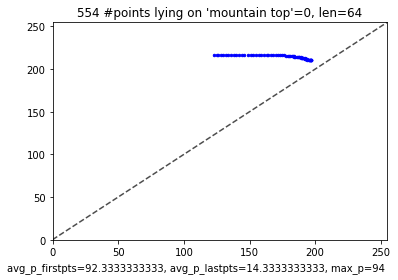

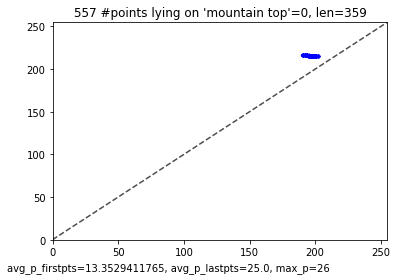

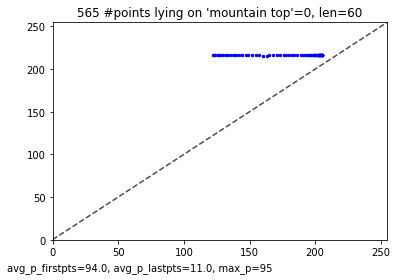

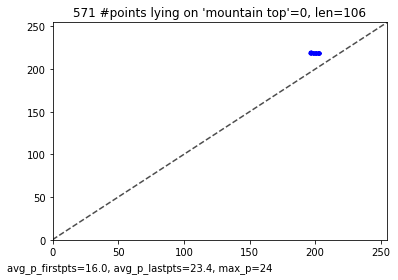

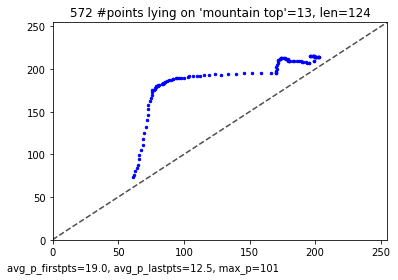

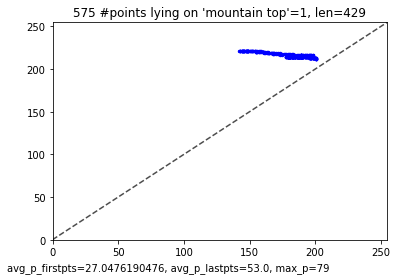

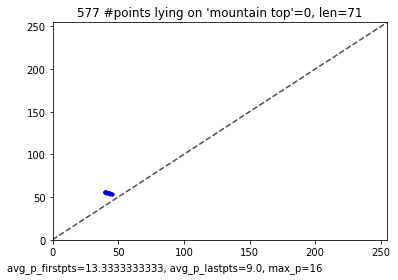

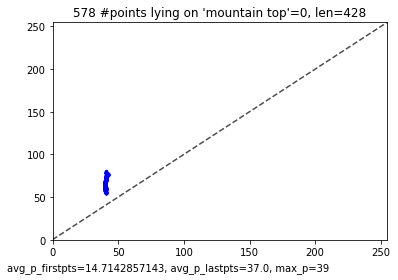

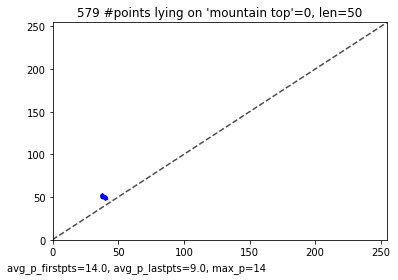

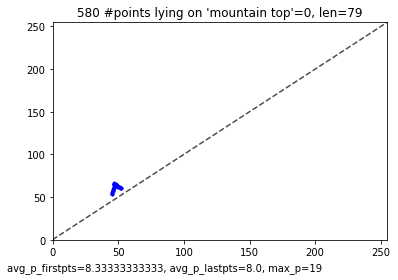

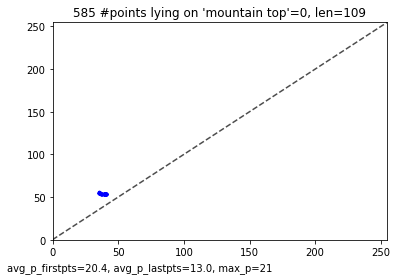

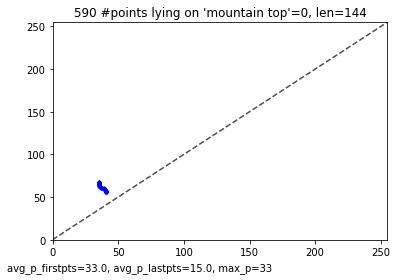

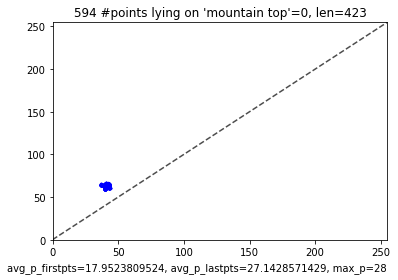

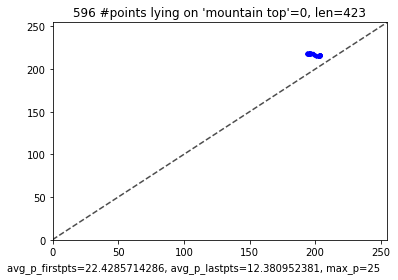

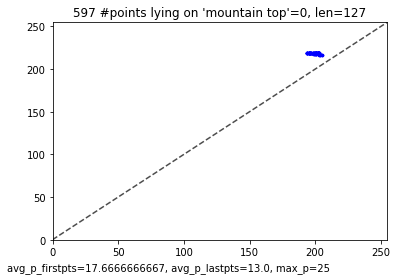

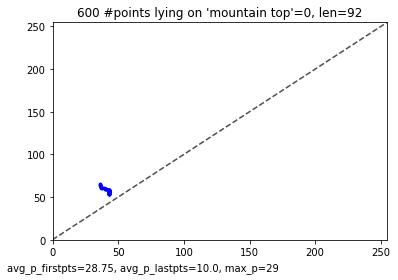

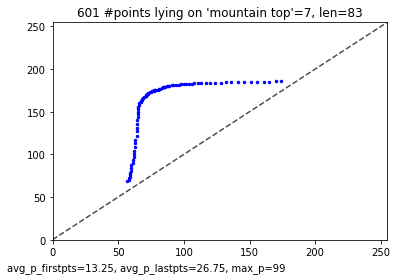

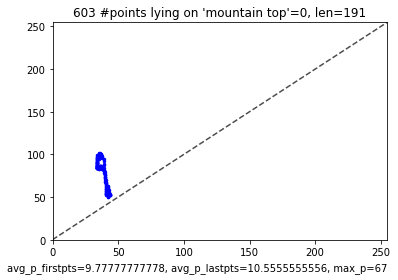

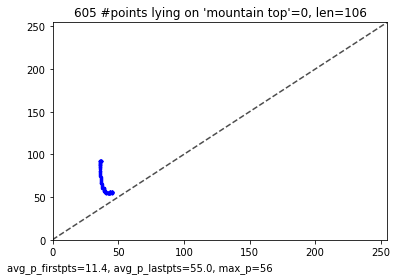

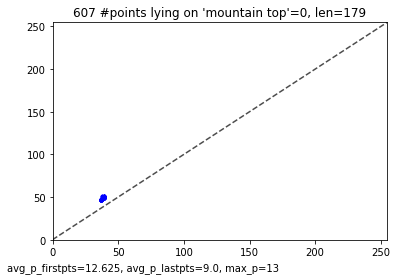

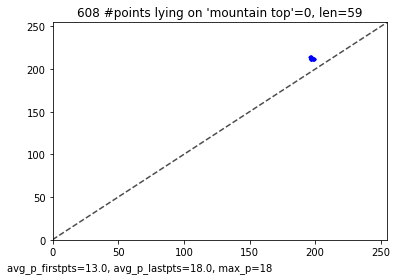

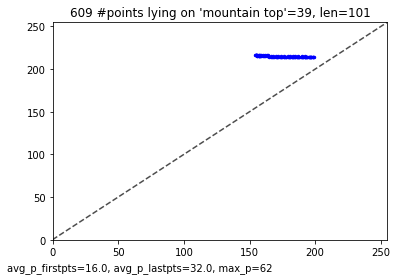

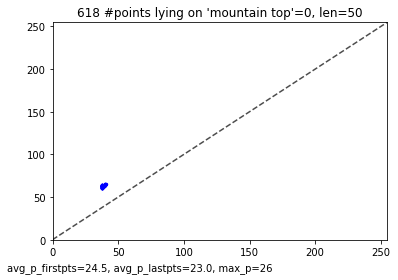

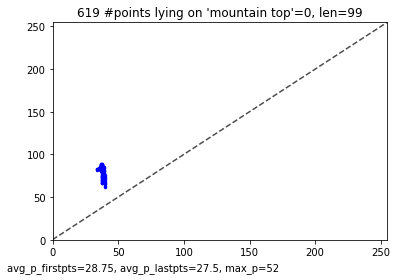

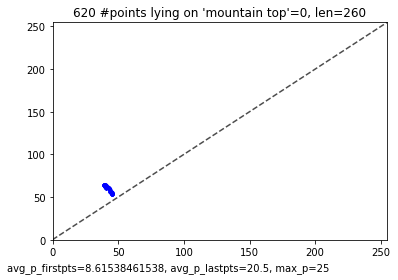

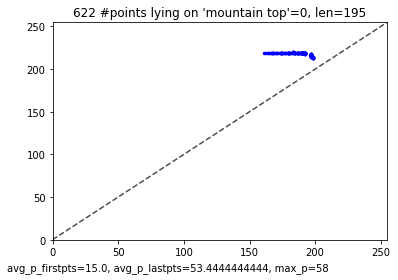

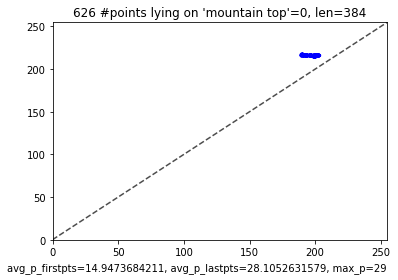

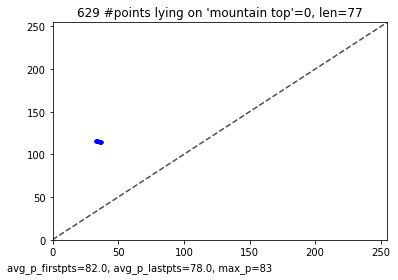

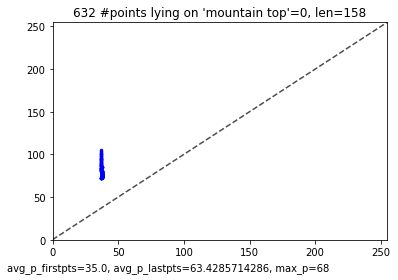

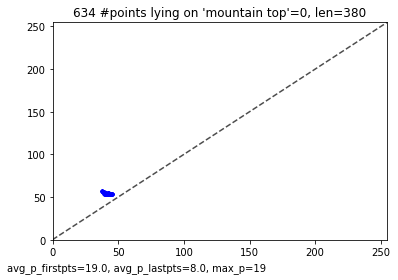

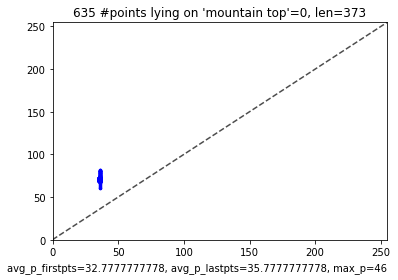

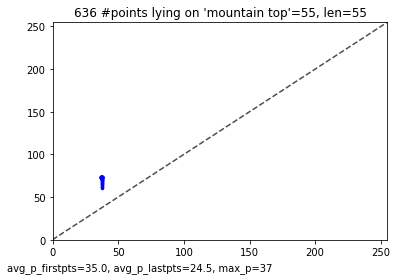

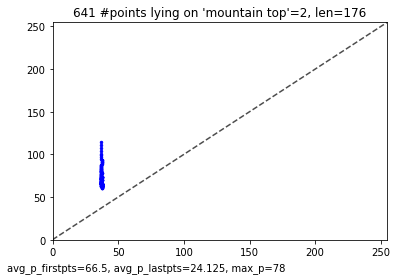

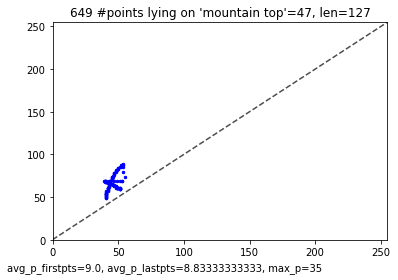

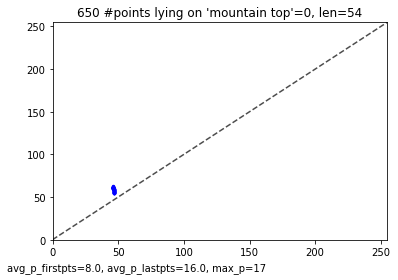

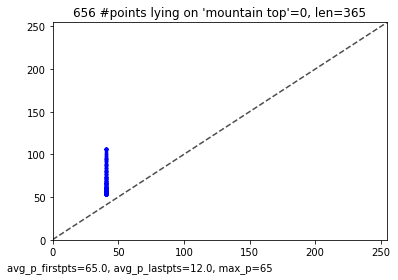

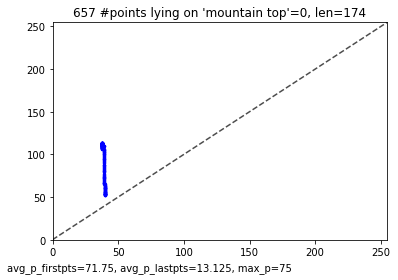

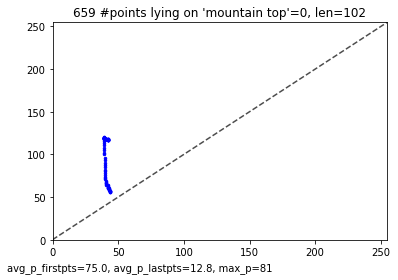

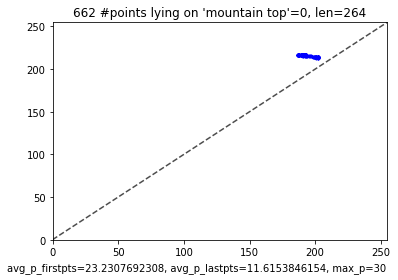

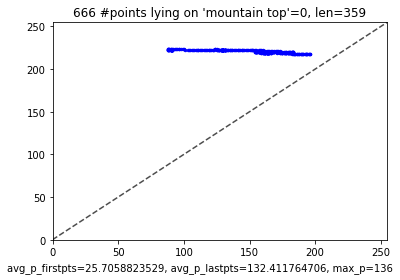

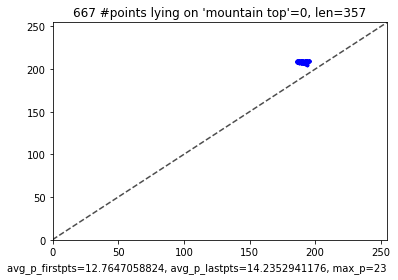

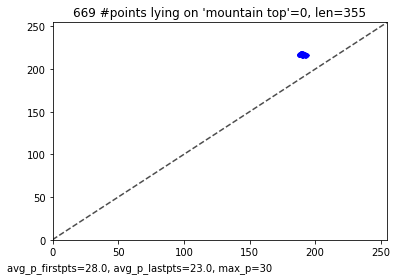

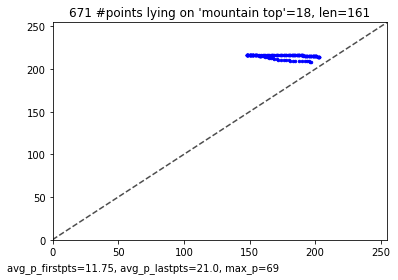

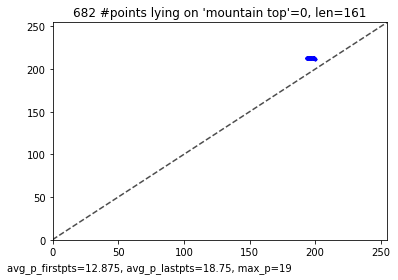

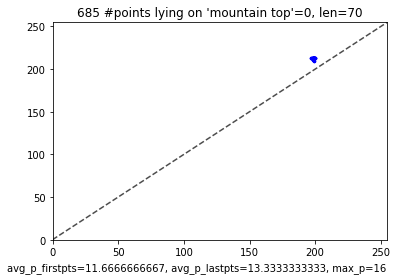

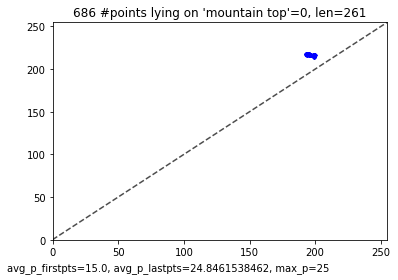

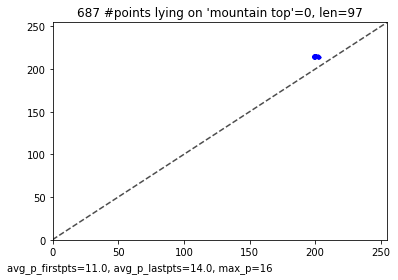

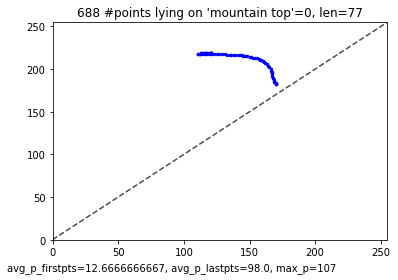

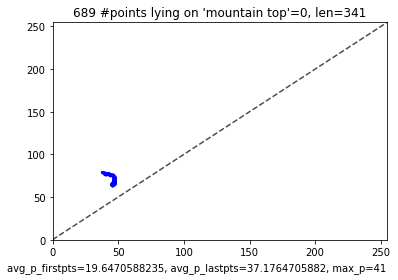

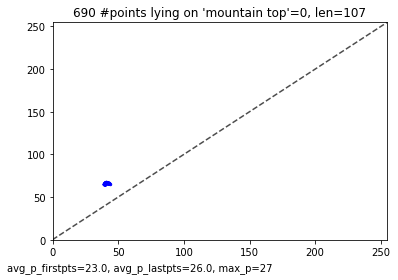

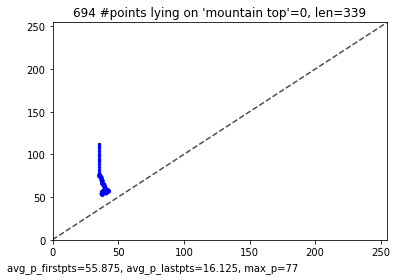

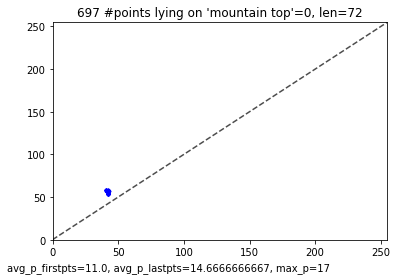

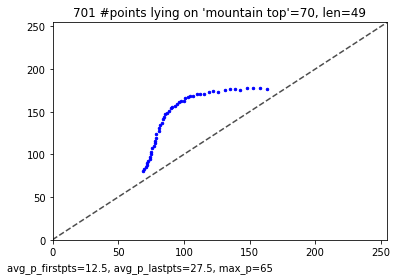

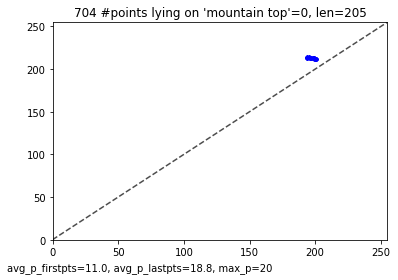

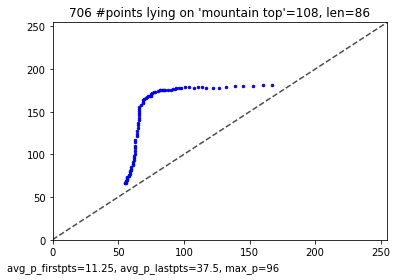

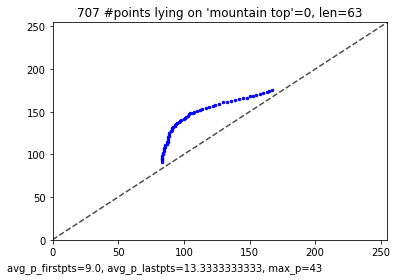

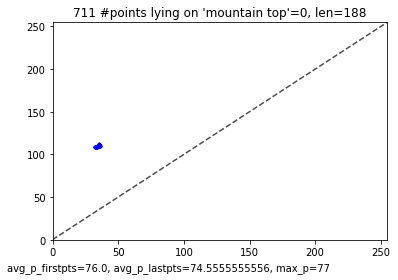

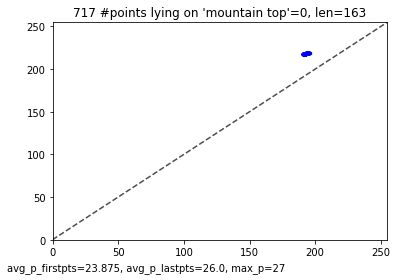

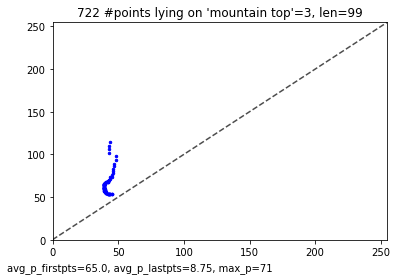

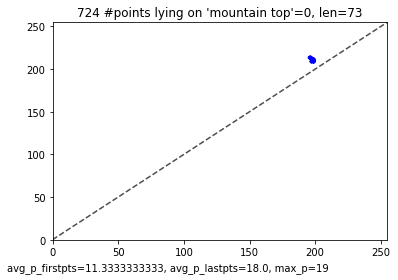

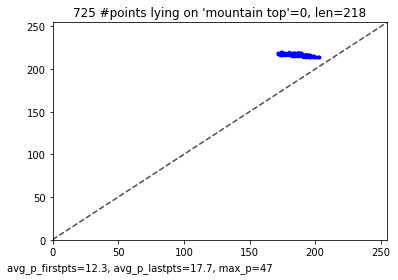

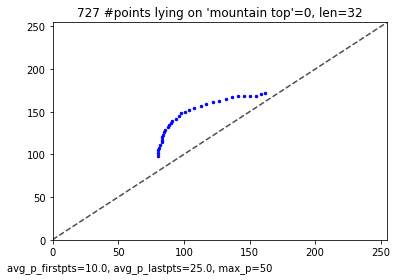

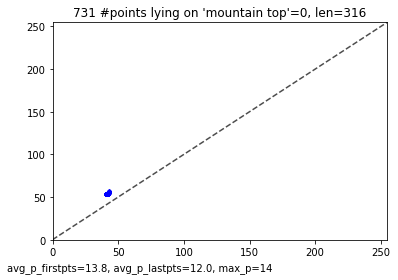

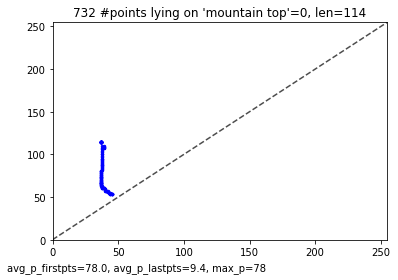

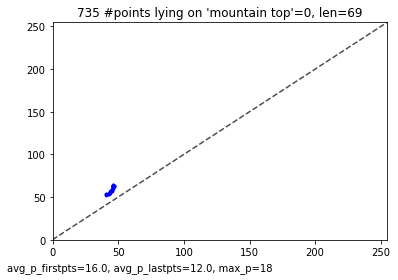

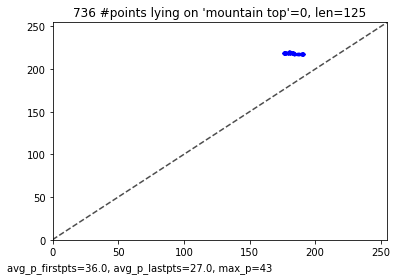

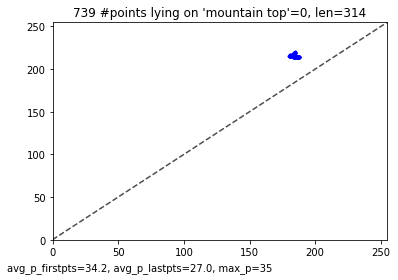

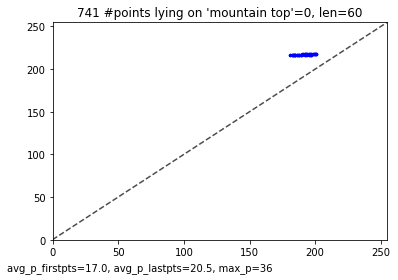

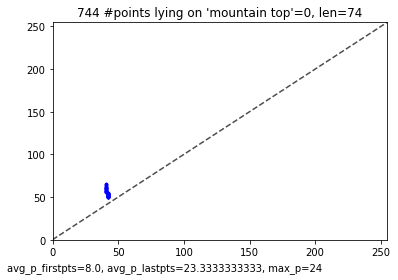

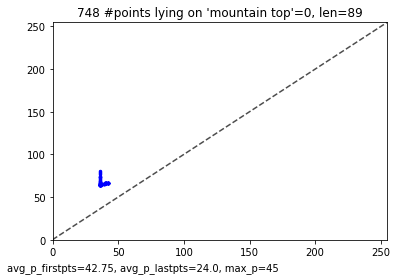

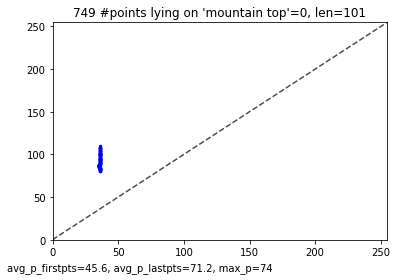

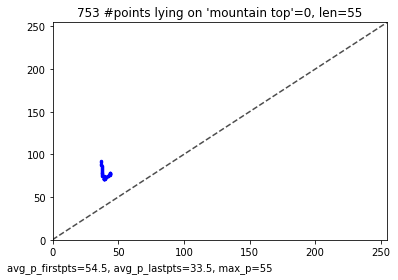

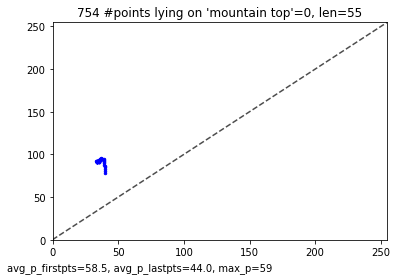

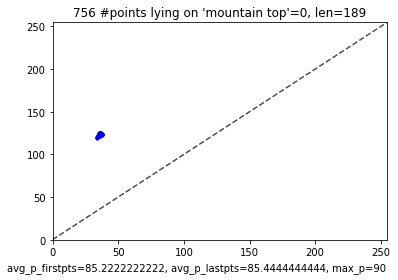

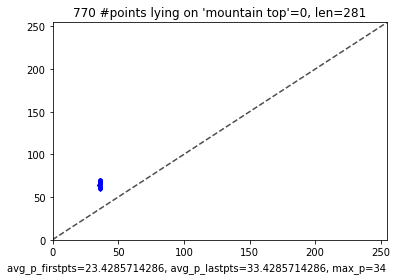

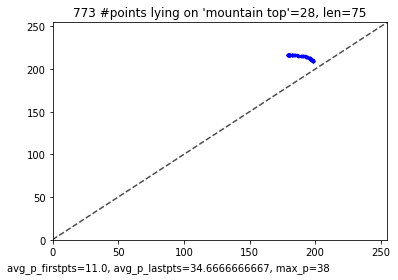

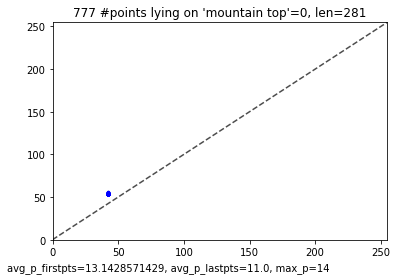

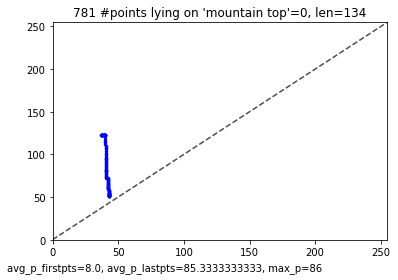

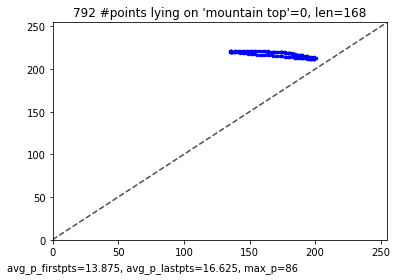

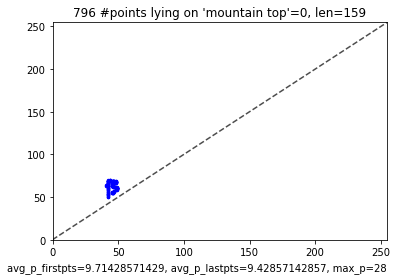

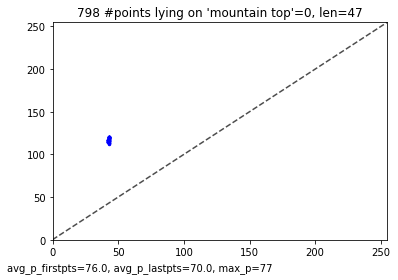

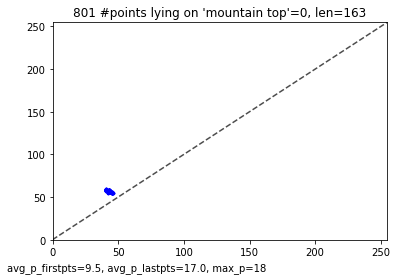

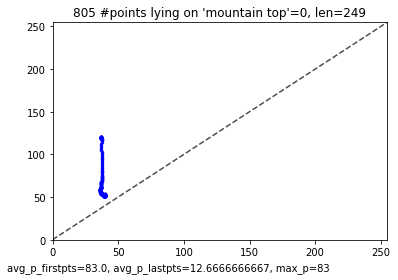

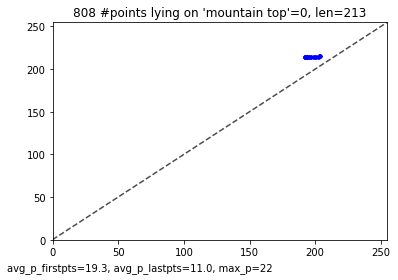

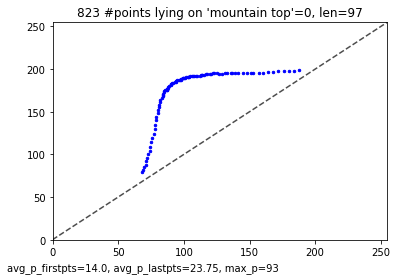

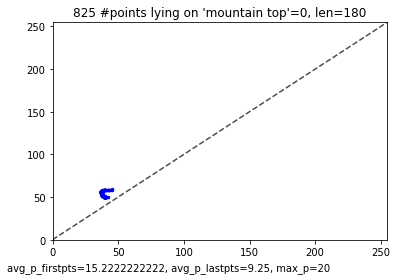

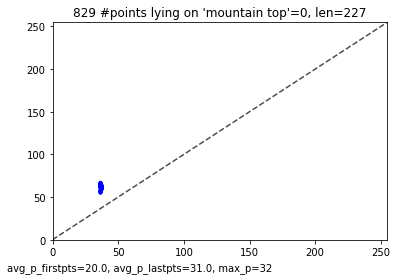

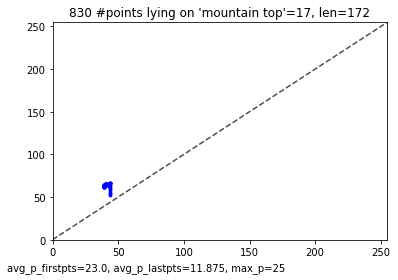

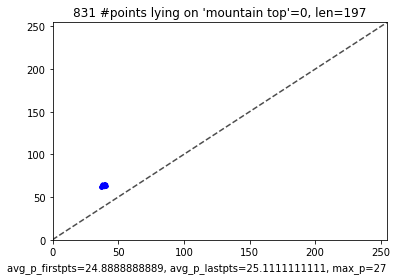

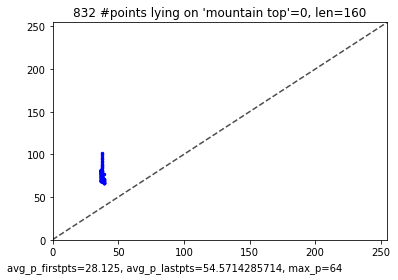

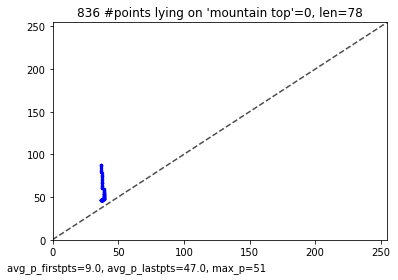

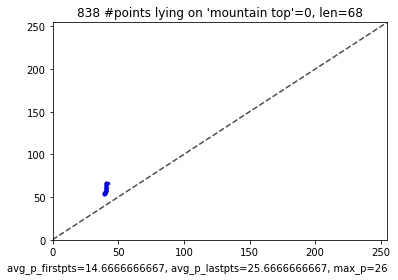

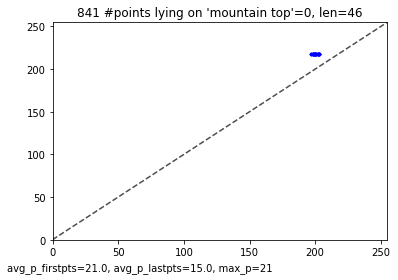

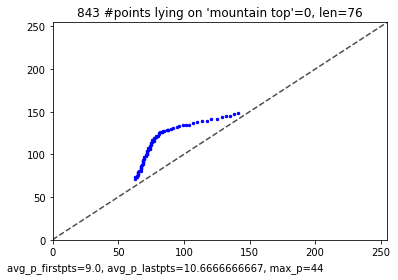

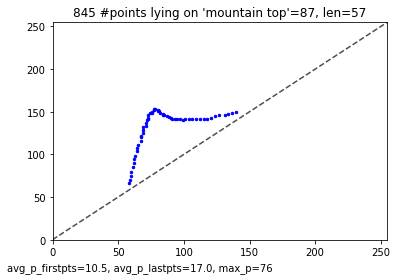

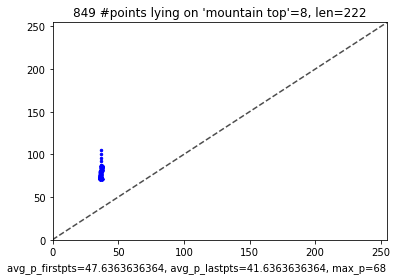

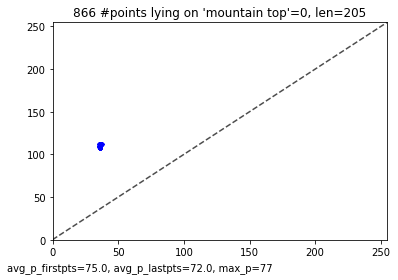

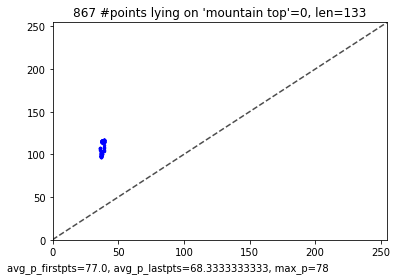

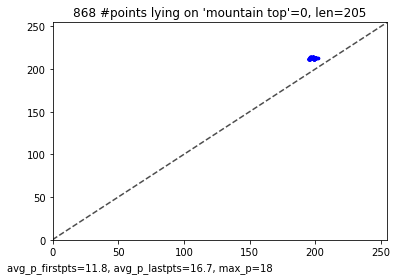

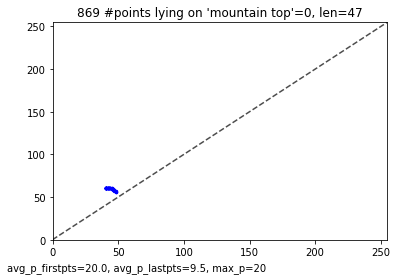

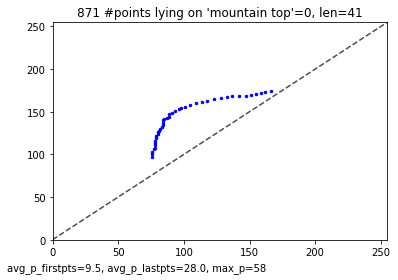

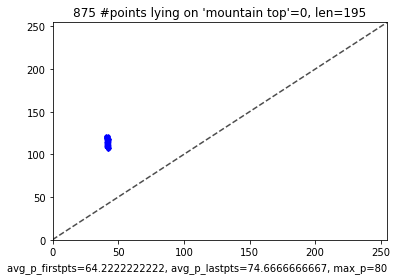

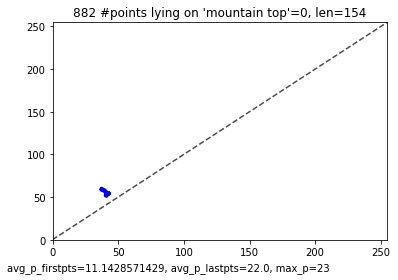

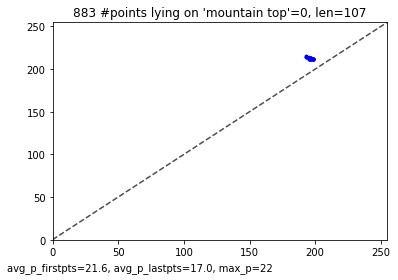

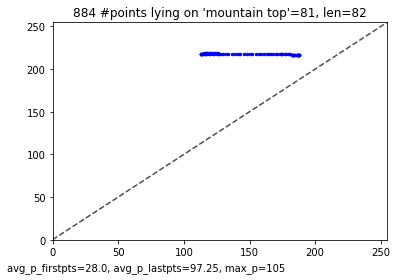

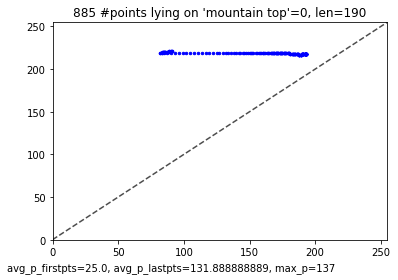

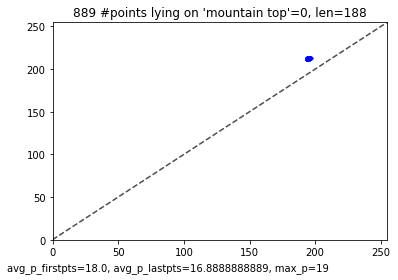

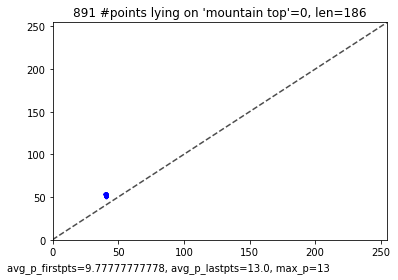

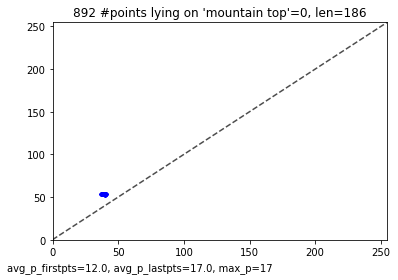

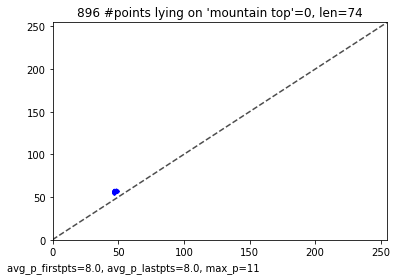

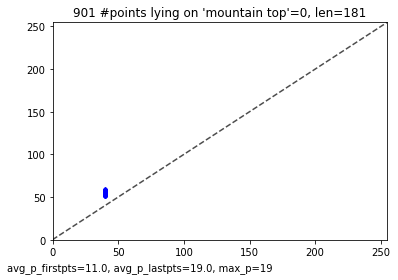

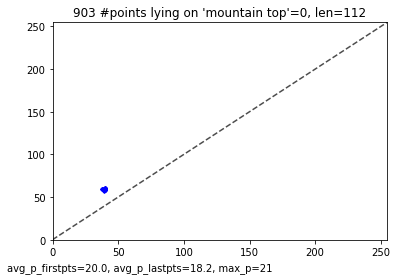

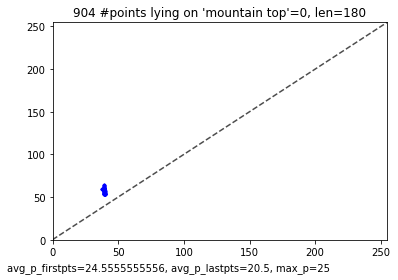

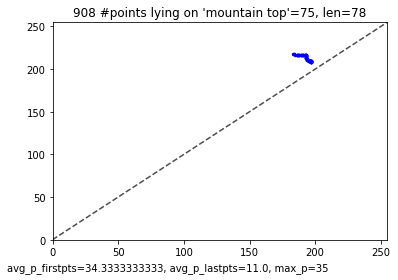

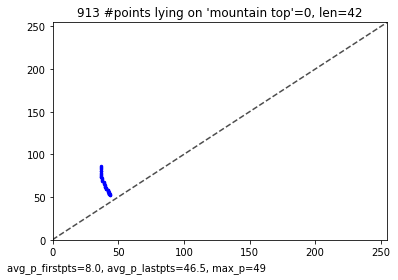

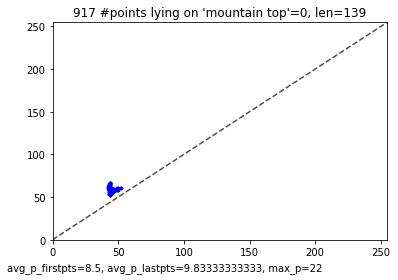

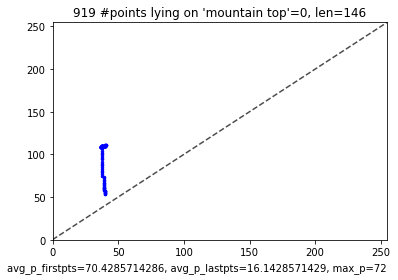

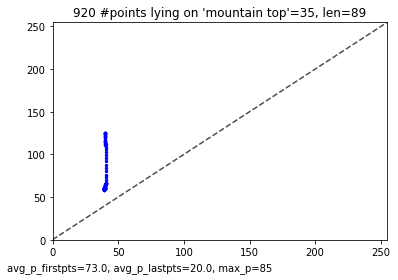

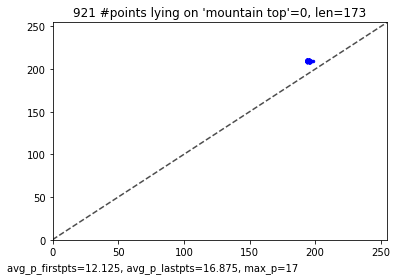

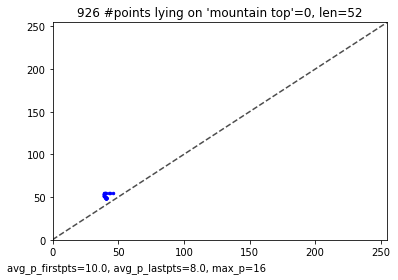

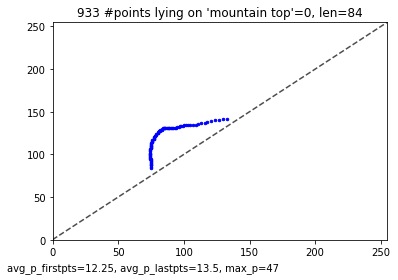

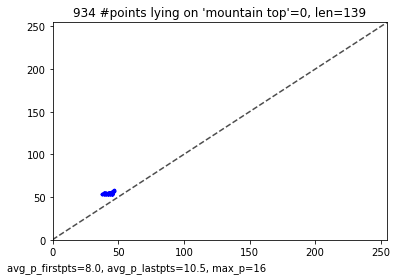

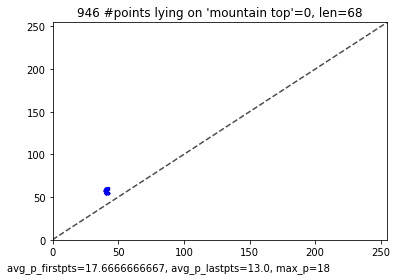

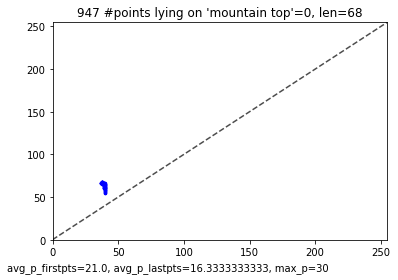

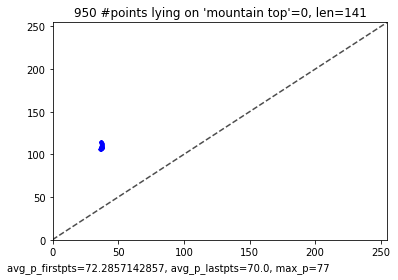

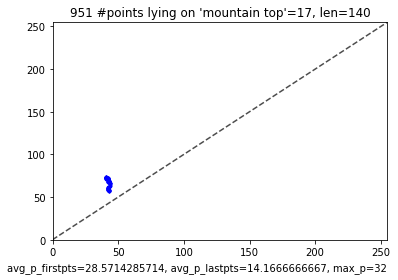

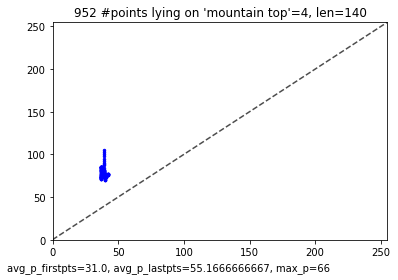

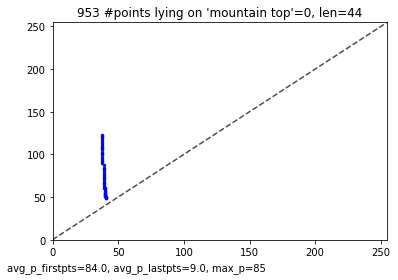

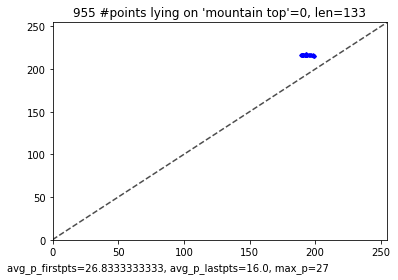

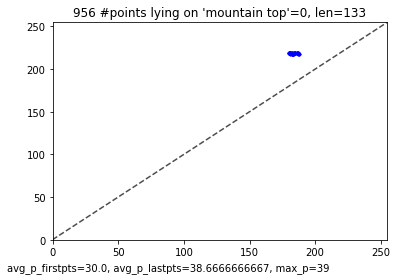

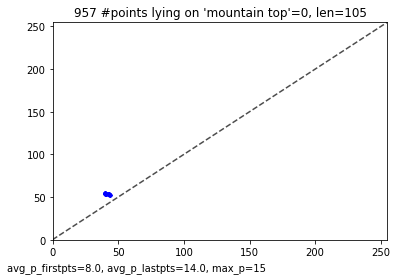

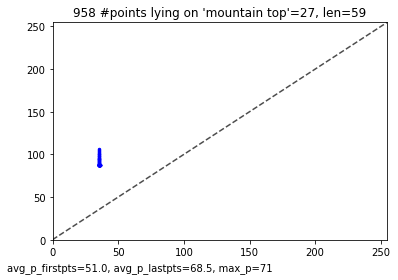

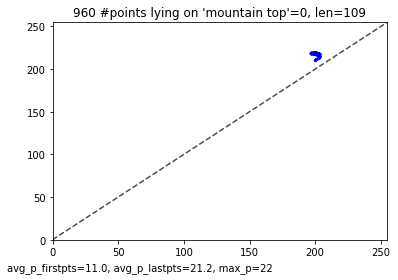

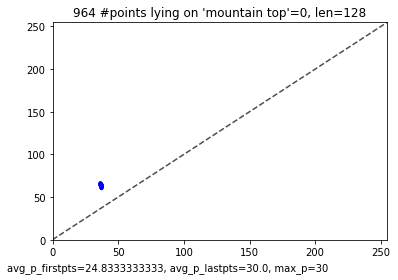

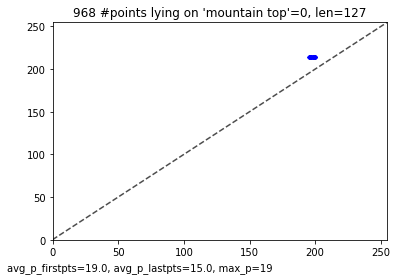

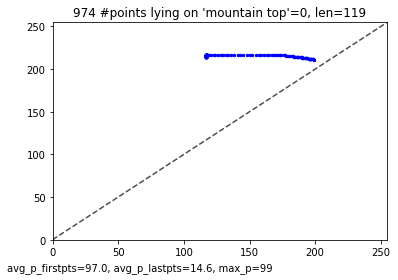

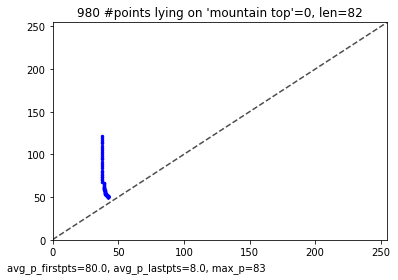

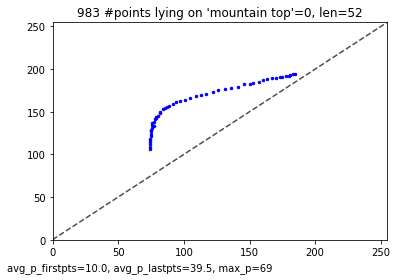

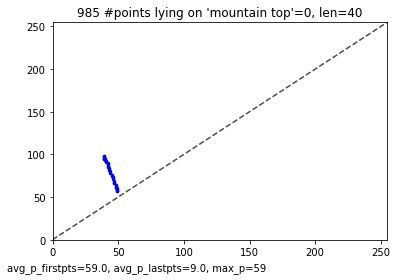

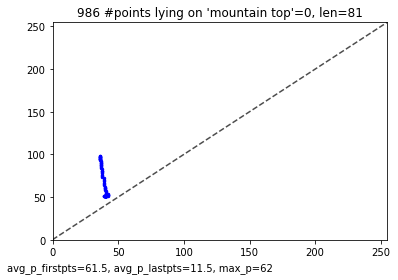

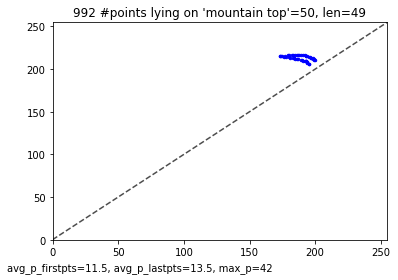

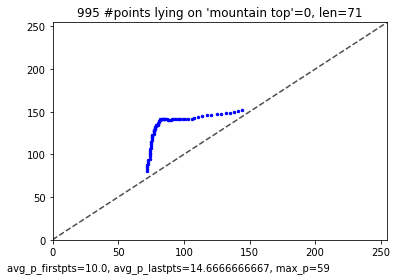

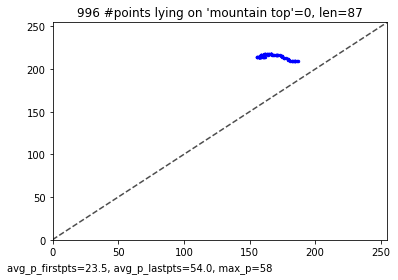

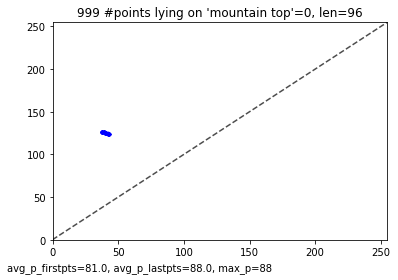

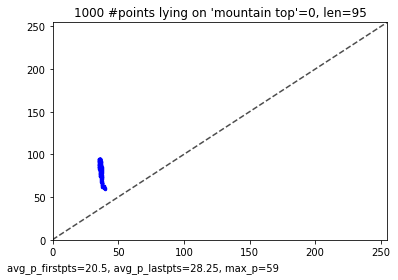

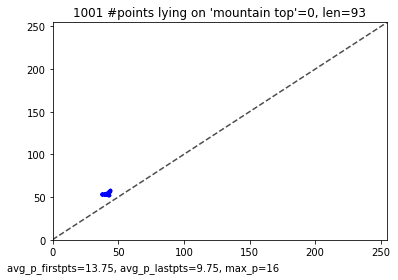

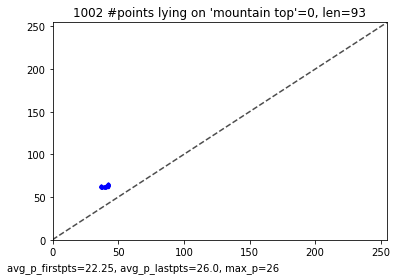

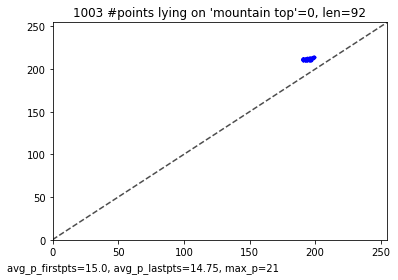

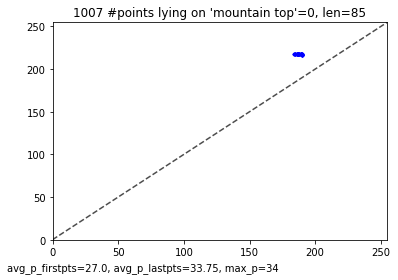

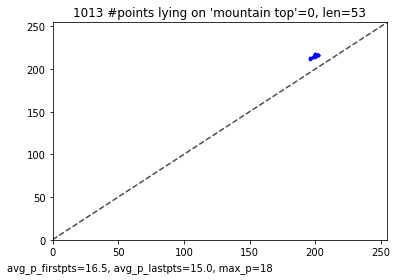

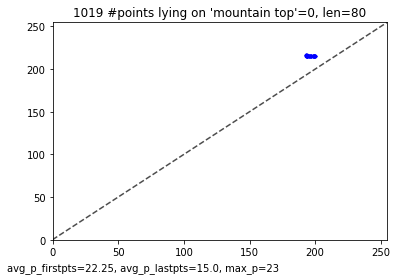

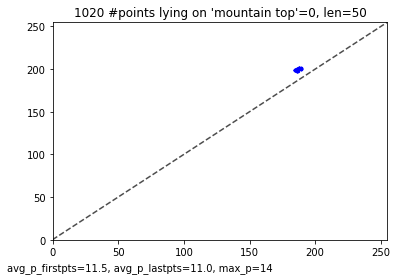

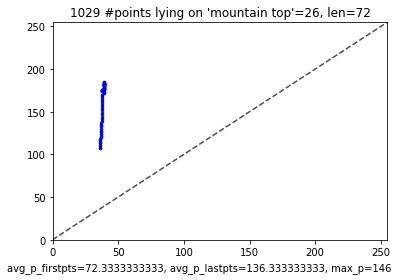

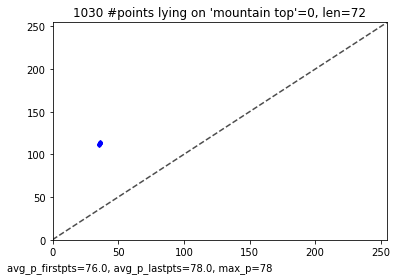

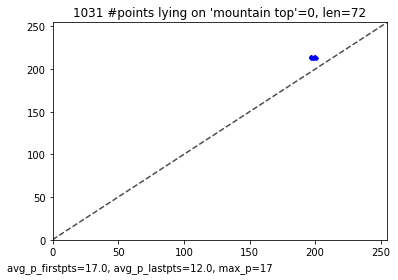

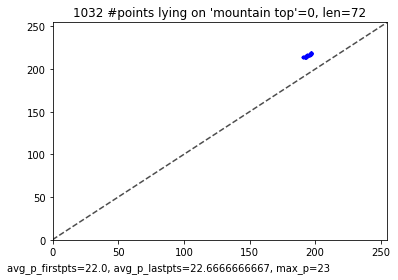

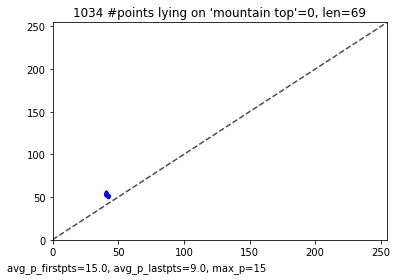

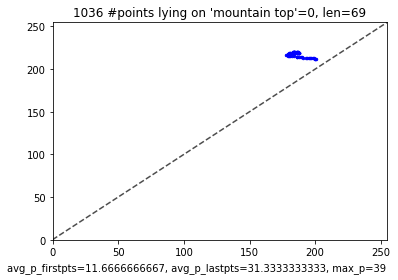

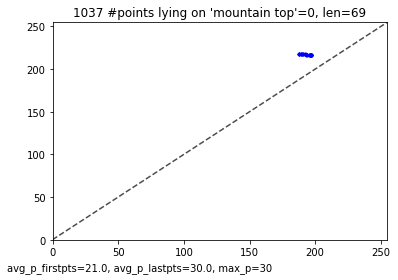

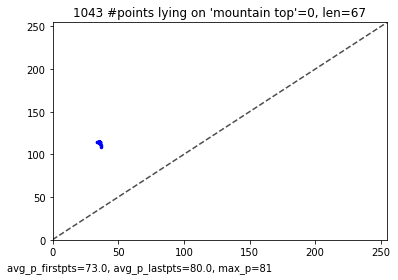

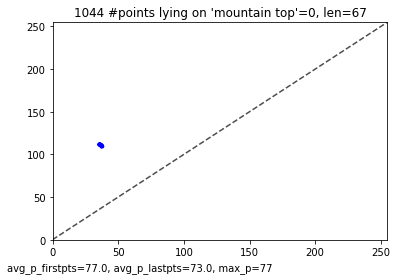

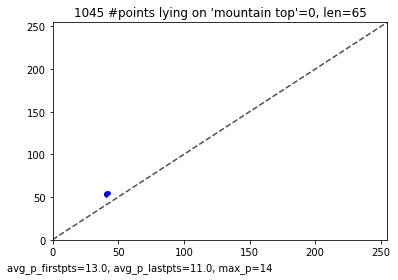

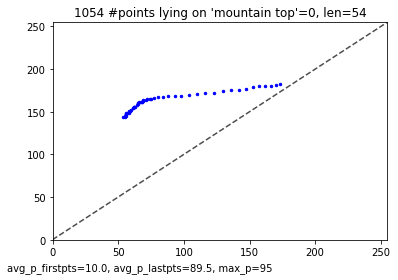

countfilteredpaths=394
counttotalpaths=1105
countfilteredandinteresting=22


In [60]:
#plots all paths satisfying certain characteristic

from extract_paths import ind
import numpy as np

count = 0
countfilteredpaths = 0
counttotalpaths = 0
countfilteredandinteresting = 0

for i in range(len(paths)):
    counttotalpaths += 1
    #computes some statistics of the paths
    paths[i][ind('high_b_lyap')] = len( [x for x in paths[i][ind('b_lyap')] if x == 0] )
    paths[i][ind('high_d_lyap')] = len( [x for x in paths[i][ind('d_lyap')] if x == 0] )
    pathlen = paths[i][2] - paths[i][1]
    if( (int)(0.05*pathlen) > 0 ):
        paths[i][ind('avg_p_firstpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[0:(int)(0.05*pathlen)] )
    if( (int)(0.95*pathlen) < pathlen-1 ):
        paths[i][ind('avg_p_lastpts')] = np.average( ( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )[(int)(0.95*pathlen):pathlen-1] )
    paths[i][ind('max_p')] = np.max( np.array(paths[i][ind('death')]) - np.array(paths[i][ind('birth')]) )
    paths[i][ind('avg_b')] = np.average( np.array(paths[i][ind('birth')]) )
    
    fldist = (paths[i][ind('birth')][0]-paths[i][ind('birth')][-1])*(paths[i][ind('birth')][0]-paths[i][ind('birth')][-1]) + (paths[i][ind('death')][0]-paths[i][ind('death')][-1])*(paths[i][ind('death')][0]-paths[i][ind('death')][-1])
    sat = (pathlen > 30 and (paths[i][ind('avg_p_firstpts')] <= 15 or paths[i][ind('avg_p_lastpts')] <= 15) and paths[i][ind('max_p')] > 40 and pathlen < 200) or (pathlen > 600 and paths[i][ind('max_p')] > 140) or (paths[i][ind('birth')][0] <= 50 and pathlen > 45 and fldist > 5) or (paths[i][ind('birth')][0] >= 180 and pathlen > 45 and fldist > 5)
    
    if( sat ):
        #plots the path which picksup the vector
        pyp.title((str)(i) + " #points lying on 'mountain top'=" + (str)(paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]) + ', len=' + (str)(pathlen))
        pyp.scatter(paths[i][ind('birth')], paths[i][ind('death')], c= 'blue', s=6)
        pyp.figtext(.02, .02, "avg_p_firstpts=" + (str)(paths[i][ind('avg_p_firstpts')]) + ", avg_p_lastpts=" + (str)(paths[i][ind('avg_p_lastpts')]) + ", max_p=" + (str)(paths[i][ind('max_p')]))
        ax = pyp.gca()        
        ax.set_ylim([0,255])
        ax.set_xlim([0,255])
        ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
        pyp.show()
    if(sat):
        countfilteredpaths += 1
    if( (sat and paths[i][ind('dim')] == 0 and paths[i][ind('high_b_lyap')] > 5) or (sat and paths[i][ind('dim')] == 1 and paths[i][ind('high_d_lyap')] > 5)):
        count += paths[i][ind('high_b_lyap')] + paths[i][ind('high_d_lyap')]        
        countfilteredandinteresting += 1
#print(count)
print('countfilteredpaths=' + (str)(countfilteredpaths))
print('counttotalpaths=' + (str)(counttotalpaths))
print('countfilteredandinteresting=' + (str)(countfilteredandinteresting))
